## Yulu Case study

#### About the company:
    Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

In [83]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

## 1. Problem Statement

1. Which all features/attributes are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those features describe the electric cycle demands.
3. Check which all features are dependent on which other features available (dependency).
4. Checking the distribution of the variables before implementing any hypothesis test to see which test is most suitable. 
5. Use suitable Hypothesis tests to check whether:
- Working day has any effect on no. of cycles rented.
- Holiday has any effect on no. of cycles rented.
- No. of cycles rented are similar or different in different seasons
- No. of cycles rented are similar or different in different weather
- Weather is dependent on season or not.
6. What were the main reasons of dip in revenue and how can Yulu turn it around.
7. Recommend Yulu with the best possible solutions(based on Insights) to overcome the crisis and bring the business back to track.

----------------

## 2. Data Exploration & Non-Graphical analysis.

In [2]:
# Importing the dataset.
df= pd.read_csv('bike_sharing.csv')

In [3]:
# No of rows and columns.
df.shape

(10886, 12)

10886 records are present with 12 different attributes.

In [4]:
# Preview of the data.
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  01-01-2011 00:00       1        0           0        1  9.84  14.395   
1  01-01-2011 01:00       1        0           0        1  9.02  13.635   
2  01-01-2011 02:00       1        0           0        1  9.02  13.635   
3  01-01-2011 03:00       1        0           0        1  9.84  14.395   
4  01-01-2011 04:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

#### Column Profiling:
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not.
- working day: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered.

In [5]:
# Overview of attributes, datatypes, null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of datetime is object by default which needs to be changed to date type

In [6]:
# Changing the datatype of categorical columns to category.

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [8]:
# Checking for duplicate records.
df.duplicated().value_counts()

False    10886
dtype: int64

There are no duplicates present in the dataset.

In [9]:
df[['temp','atemp','humidity','windspeed','casual','registered','count']].describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

- casual and registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.
------------------------------------------
- Mean temp = 20.23 degree celsius & Standart deviation of temp = 7.79
- Mean Humidity = 61.89 & Standart deviation of humidity = 19.24
- Mean Windspeed = 12.8 & Standart deviation of windspeed = 8.16
- Mean atemp = 23.65 degree celsius & Standart deviation of atemp = 8.47

In [10]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Data is evenly collected from all four types of seasons of India climate which can give a good insight.

In [11]:
# Converting the datetime column from object type to date type.
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
# Segregating the date into a different column.
df['date'] = df['datetime'].dt.date

In [13]:
# Changing the datatype of date column to datetime.
df['date'] = pd.to_datetime(df['date'])

In [58]:
# Distribution of days among holidays and non-holidays.
np.round(df.groupby('holiday')['date'].nunique()/df['date'].nunique()*100,2)

holiday
0    97.15
1     2.85
Name: date, dtype: float64

There are about 2.85% government holidays in a period of 2 years.

In [57]:
# distribution of the timeframe among weekdays ad weekends.
np.round(df.groupby('workingday')['date'].nunique()/df['date'].nunique()*100,2)

workingday
0    31.8
1    68.2
Name: date, dtype: float64

There are about 31.8% weekends and 68.2% working days.

In [56]:
# Percentage of times a pirticular weather conditions prevail over the timeframe.
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

Weather pattern of most the days are Clear, Few clouds, partly cloudy, partly cloudy which is expected in a tropical country like India.

In [17]:
# Range of values present in windspeed attribute.
print('Min:' , df['windspeed'].min(),'Max:' , df['windspeed'].max())

Min: 0.0 Max: 56.9969


Windspeed ranges from minimum of 0 to a maximum of 57. 

In [18]:
# Range of values present in humidity attribute.
print('Min:' , df['humidity'].min(),'Max:' , df['humidity'].max())

Min: 0 Max: 100


Humidity is generally measured on the scale of 100.

In [19]:
# Range of values present in casual attribute.
print('Min:' , df['casual'].min(),'Max:' , df['casual'].max())

Min: 0 Max: 367


Casual riders range from minimum of 0 to a maximum of 367.

In [20]:
# Range of values present in registered attribute.
print('Min:' , df['registered'].min(),'Max:' , df['registered'].max())

Min: 0 Max: 886


Registered users range from minimum of 0 to a maximum of 886.

In [21]:
# Range of values present in count attribute.
print('Min:' , df['count'].min(),'Max:' , df['count'].max())

Min: 1 Max: 977


Total riders range  from minimum of 0 to a maximum of 977.

In [22]:
# Mapping all values of season with their respective representations.
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall',4: 'Winter'}
# Replace values in the 'season' column 
df['season'] = df['season'].replace(season_mapping)
df.head()

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00  Spring       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00  Spring       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00  Spring       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00  Spring       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count       date  
0        81        0.0       3          13     16 2011-01-01  
1        80        0.0       8          32     40 2011-01-01  
2        80        0.0       5          27     32 2011-01-01  
3        75        0.0       3          10     13 2011-01-01  
4        75        0.0       0           1      1 2011-01-01

Encoding the real interpretations of the values in season attribute.

In [23]:
# Getting the timeframe of dataset collected i.e. the from what date to what date does the data belongs to.
print('Start date:',df['datetime'].min(),'End date:', df['datetime'].max())

Start date: 2011-01-01 00:00:00 End date: 2012-12-19 23:00:00


Data consists of records starting from 12 A.M of 1st January 2011 to 11 P.M of the 19th December 2012 i.e. the data is of 2 years of the services provided by Yulu.

In [24]:
# Deriving the day of the week by name.
df['weekday'] = df['date'].dt.day_name()

In [25]:
df.groupby('season')['date'].nunique()

season
Fall      114
Spring    114
Summer    114
Winter    114
Name: date, dtype: int64

The data available is evenly spread across all the seasons which is very good for the analysis.

In [26]:
# setting the 'datetime' column as the index of the DataFrame 'df' 
df.set_index('datetime', inplace = True)

# Setting 'datetime' column as the index allows us easier analysis and resampling.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  object        
 1   holiday     10886 non-null  object        
 2   workingday  10886 non-null  object        
 3   weather     10886 non-null  object        
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  date        10886 non-null  datetime64[ns]
 12  weekday     10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.2+ MB


In [28]:
df.head()

season holiday workingday weather  temp   atemp  \
datetime                                                               
2011-01-01 00:00:00  Spring       0          0       1  9.84  14.395   
2011-01-01 01:00:00  Spring       0          0       1  9.02  13.635   
2011-01-01 02:00:00  Spring       0          0       1  9.02  13.635   
2011-01-01 03:00:00  Spring       0          0       1  9.84  14.395   
2011-01-01 04:00:00  Spring       0          0       1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2011-01-01 04:00:00        75        0.0       0           1      1   

                          date   weekday  
datetime                                  
2011-01-01 00:00:00 2011-01-01  Saturday  
2011-01-01 01:00:00 2011-01-01  Saturday  
2011-01-01 02:00:00 2011-01-01  Saturday  
2011-01-01 03:00:00 2011-01-01  Saturday  
2011-01-01 04:00:00 2011-01-01  Saturday

In [234]:
df1 = df['casual'].sum()
df2 = df['registered'].sum()
print('Percentage of registered users', np.round(df2/(df1+df2)*100,2))

Percentage of registered users 81.2


------------------

## 3. Visualization and Outliers.

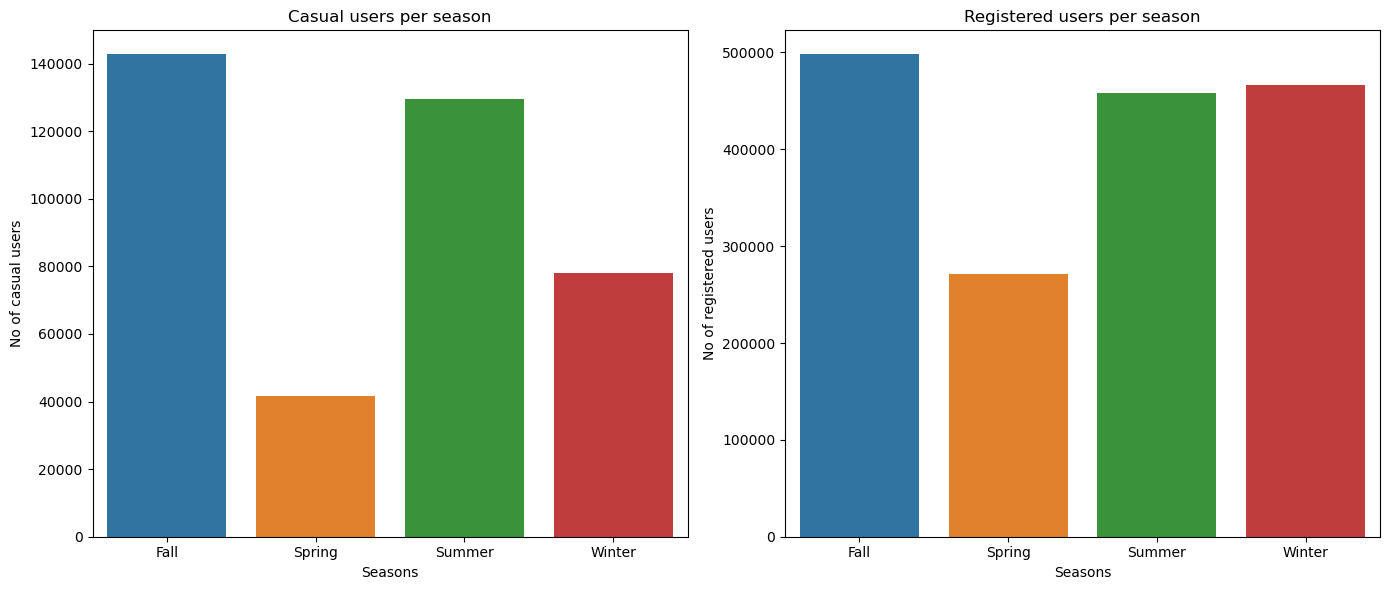

In [29]:
# Subplots for no of casual and registered users per season.

df2 = df.groupby('season')['casual'].sum().reset_index()
df1 = df.groupby('season')['registered'].sum().reset_index()

# Chart 1: No of customers in each age group
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=df2, x='season', y='casual')
plt.xlabel('Seasons')
plt.ylabel('No of casual users')
plt.title('Casual users per season')

# Chart 2: Percentage of customers in each age group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=df1, x='season', y='registered') 
plt.xlabel('Seasons')
plt.ylabel('No of registered users')
plt.title('Registered users per season')

# To prevent overlap
plt.tight_layout()
plt.show()

Maximum users are renting bikes in Fall season followed by Summer and winter.

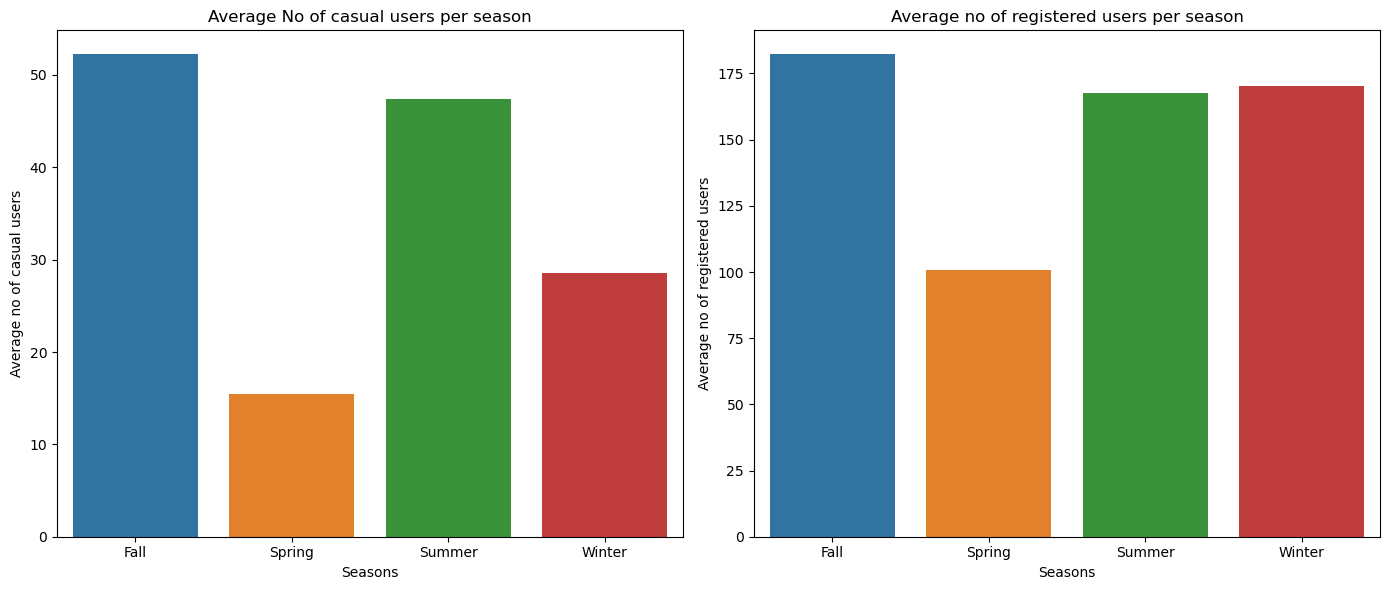

In [30]:
# Subplots for average no of casual and registered users per season.

df2 = df.groupby('season')['casual'].mean().reset_index()
df1 = df.groupby('season')['registered'].mean().reset_index()

# Chart 1: No of customers in each age group
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=df2, x='season', y='casual')
plt.xlabel('Seasons')
plt.ylabel('Average no of casual users')
plt.title('Average No of casual users per season')

# Chart 2: Percentage of customers in each age group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=df1, x='season', y='registered') 
plt.xlabel('Seasons')
plt.ylabel('Average no of registered users')
plt.title('Average no of registered users per season')

# To prevent overlap
plt.tight_layout()
plt.show()

Average number of users also follow the same pattern as of the total users.

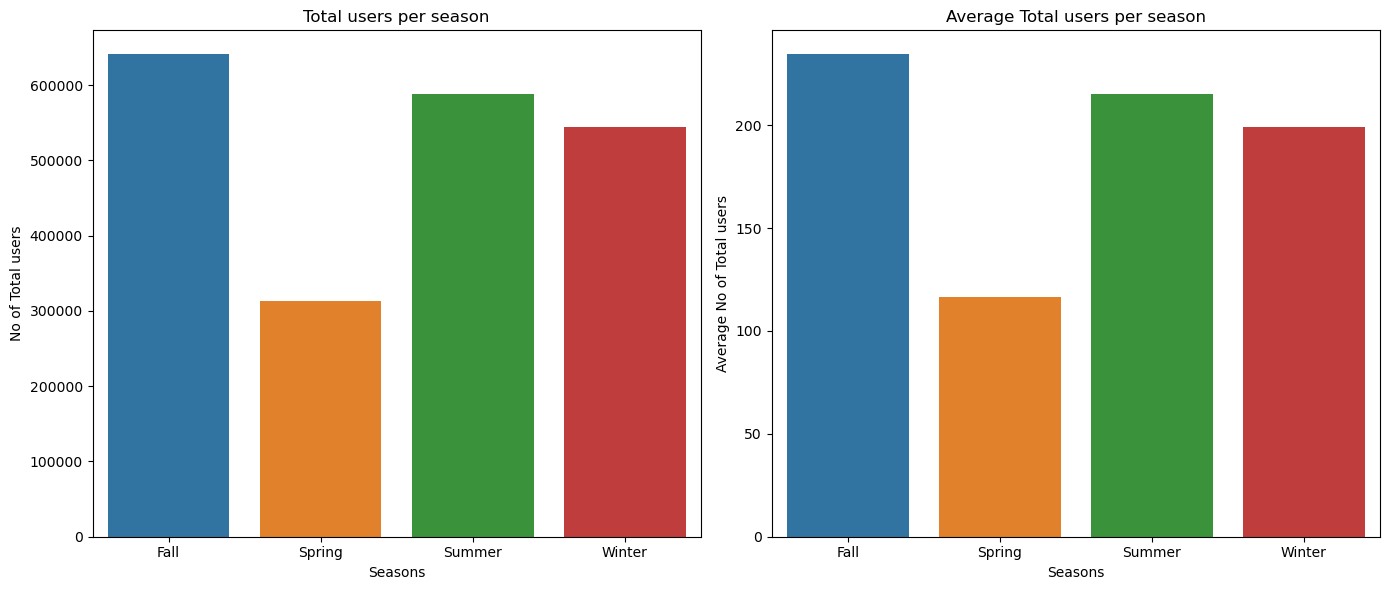

In [31]:
# Subplots for no of total users and average no of total users.

dt1 = df.groupby('season')['count'].sum().reset_index()
dt2 = df.groupby('season')['count'].mean().reset_index()

# Chart 1: No of customers in each age group
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=dt1, x='season', y='count')
plt.xlabel('Seasons')
plt.ylabel('No of Total users')
plt.title('Total users per season')

# Chart 2: Percentage of customers in each age group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=dt2, x='season', y='count') 
plt.xlabel('Seasons')
plt.ylabel('Average No of Total users')
plt.title('Average Total users per season')

# To prevent overlap
plt.tight_layout()
plt.show()

In [32]:
# To see the year on year growth of the average hourly count of bike rents.
# Resampling the DataFrame by the year 
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position down 
    # to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

datetime       count  prev_count  growth_percent
0 2011-12-31  144.223349         NaN             NaN
1 2012-12-31  238.560944  144.223349       65.410764

Year on year growth can be seen to be 65% approx which shows very good adaption for a newly launched company

Text(0, 0.5, 'Total No of Users')

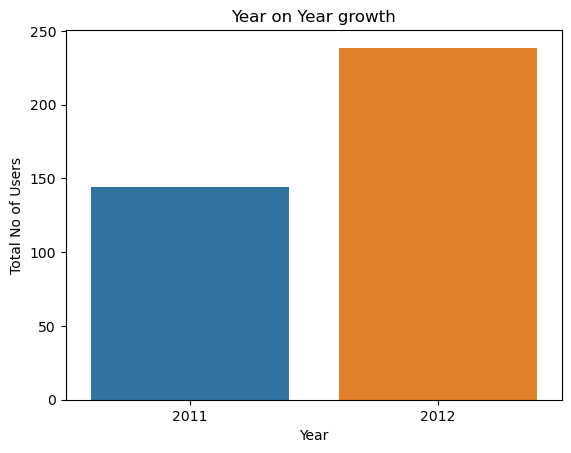

In [33]:
sns.barplot(x= df1['datetime'].astype(str).str[:4],y=df1['count'])
plt.title('Year on Year growth')
plt.xlabel('Year')
plt.ylabel('Total No of Users')

- This data suggests that there was substantial growth in the count of the variable over the course of one year.
- The mean total hourly count of bikes rented is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

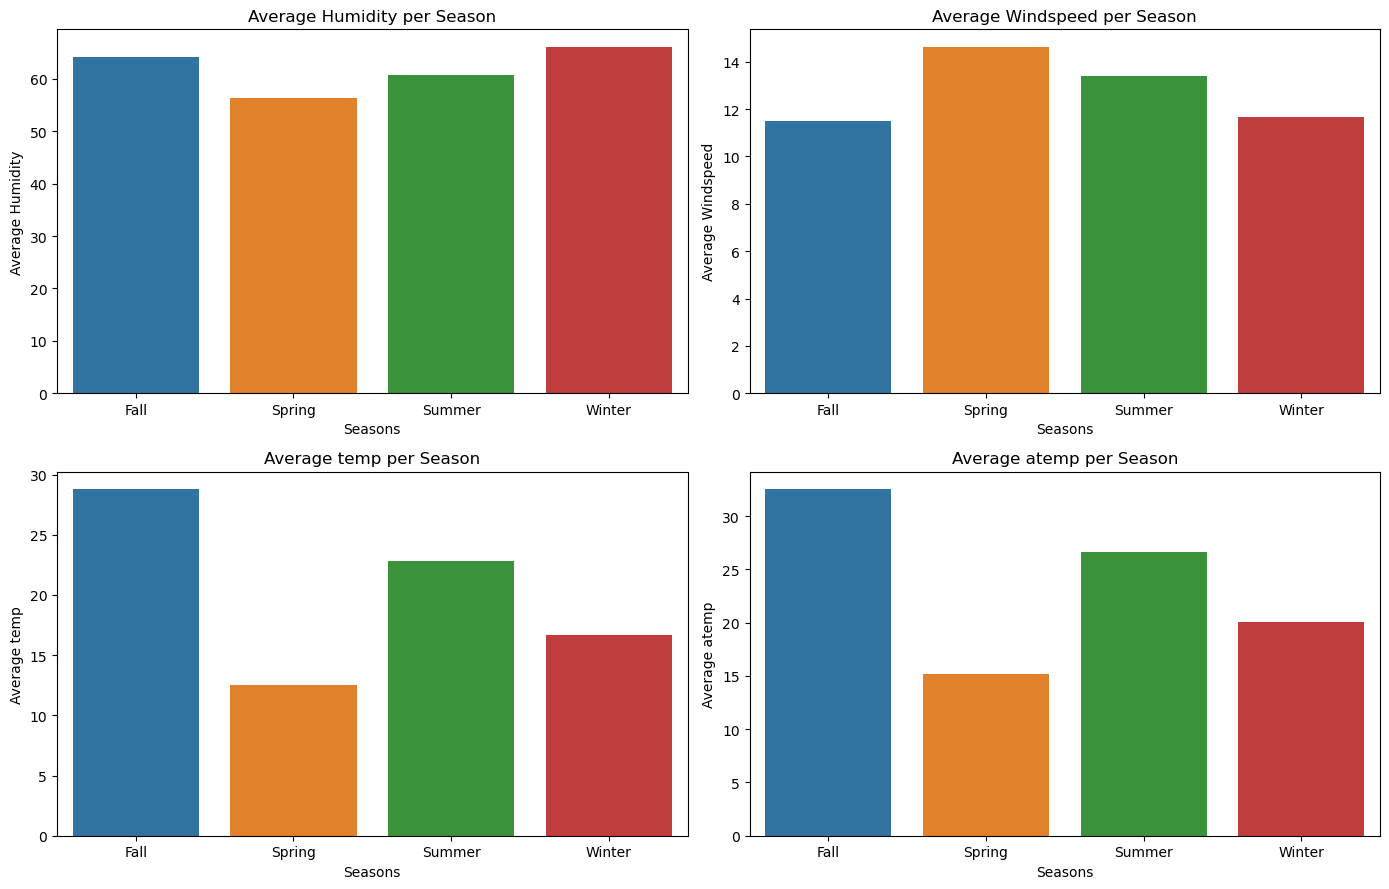

In [34]:
# To see the variation of mean humidity, temp, atemp and windspeed over different seasons.

dv = df.groupby('season')['humidity'].mean().reset_index()
dfr = df.groupby('season')['windspeed'].mean().reset_index()
de = df.groupby('season')['temp'].mean().reset_index()
dq = df.groupby('season')['atemp'].mean().reset_index()

plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
sns.barplot(data=dv, x=dv['season'],y=dv['humidity'])
plt.title('Average Humidity per Season')
plt.ylabel('Average Humidity')
plt.xlabel('Seasons')

plt.subplot(2,2,2)
sns.barplot(data=dfr, x=dfr['season'],y=dfr['windspeed'])
plt.title('Average Windspeed per Season')
plt.ylabel('Average Windspeed')
plt.xlabel('Seasons')

plt.subplot(2,2,3)
sns.barplot(data=de, x=de['season'],y=de['temp'])
plt.title('Average temp per Season')
plt.ylabel('Average temp')
plt.xlabel('Seasons')

plt.subplot(2,2,4)
sns.barplot(data=dq, x=dq['season'],y=dq['atemp'])
plt.title('Average atemp per Season')
plt.ylabel('Average atemp')
plt.xlabel('Seasons')

plt.tight_layout()

- Spring season is having least temperature, least humidity and fastest windspeed.
- Fall is the season having having most average temperature and humidity.
- Interesting to see summer season is having lesser temperature than fall season.
- Winter is the most humid season as per the dataset.

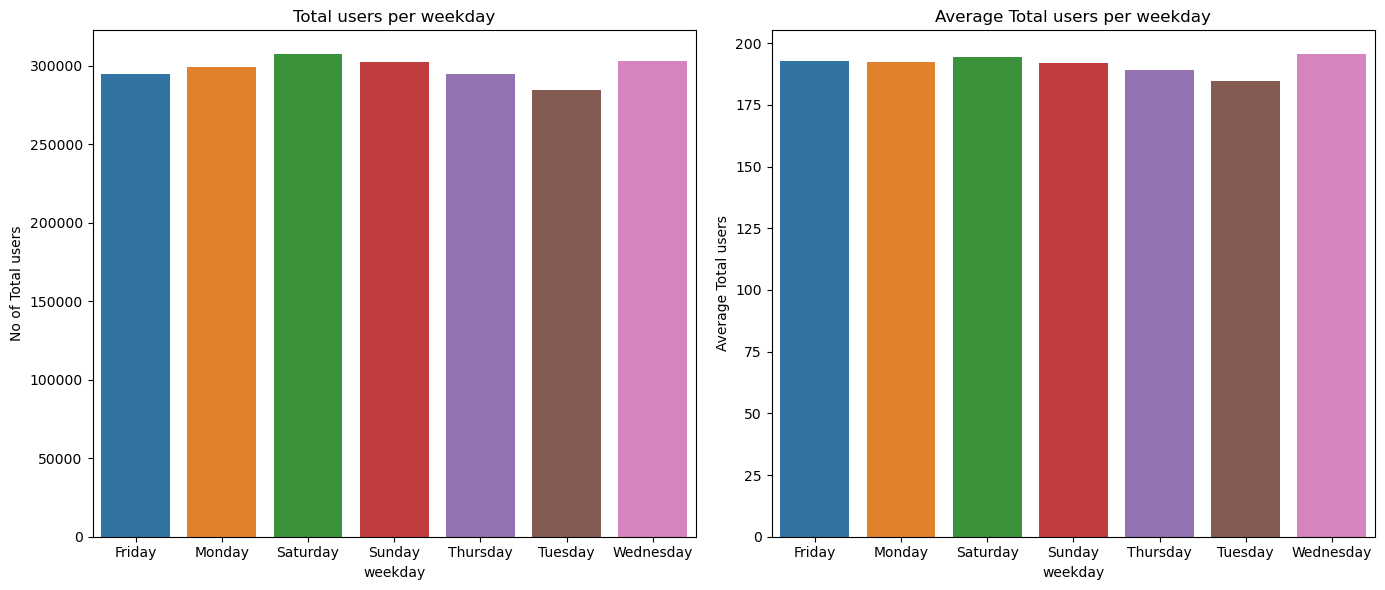

In [35]:
# Subplots for no of total users and average no of total users per day of the week.

dt1 = df.groupby('weekday')['count'].sum().reset_index()
dt2 = df.groupby('weekday')['count'].mean().reset_index()

# Chart 1: No of customers in each age group
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=dt1, x='weekday', y='count')
plt.ylabel('No of Total users')
plt.title('Total users per weekday')

# Chart 2: Percentage of customers in each age group
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=dt2, x='weekday', y='count') 
plt.ylabel('Average Total users')
plt.title('Average Total users per weekday')

# To prevent overlap
plt.tight_layout()
plt.show()

- Total and average number of users are almost same all over the week and slightly higher on the weekends which is expected.
- Tuesday is the day when the least no of users come to lease a bike.

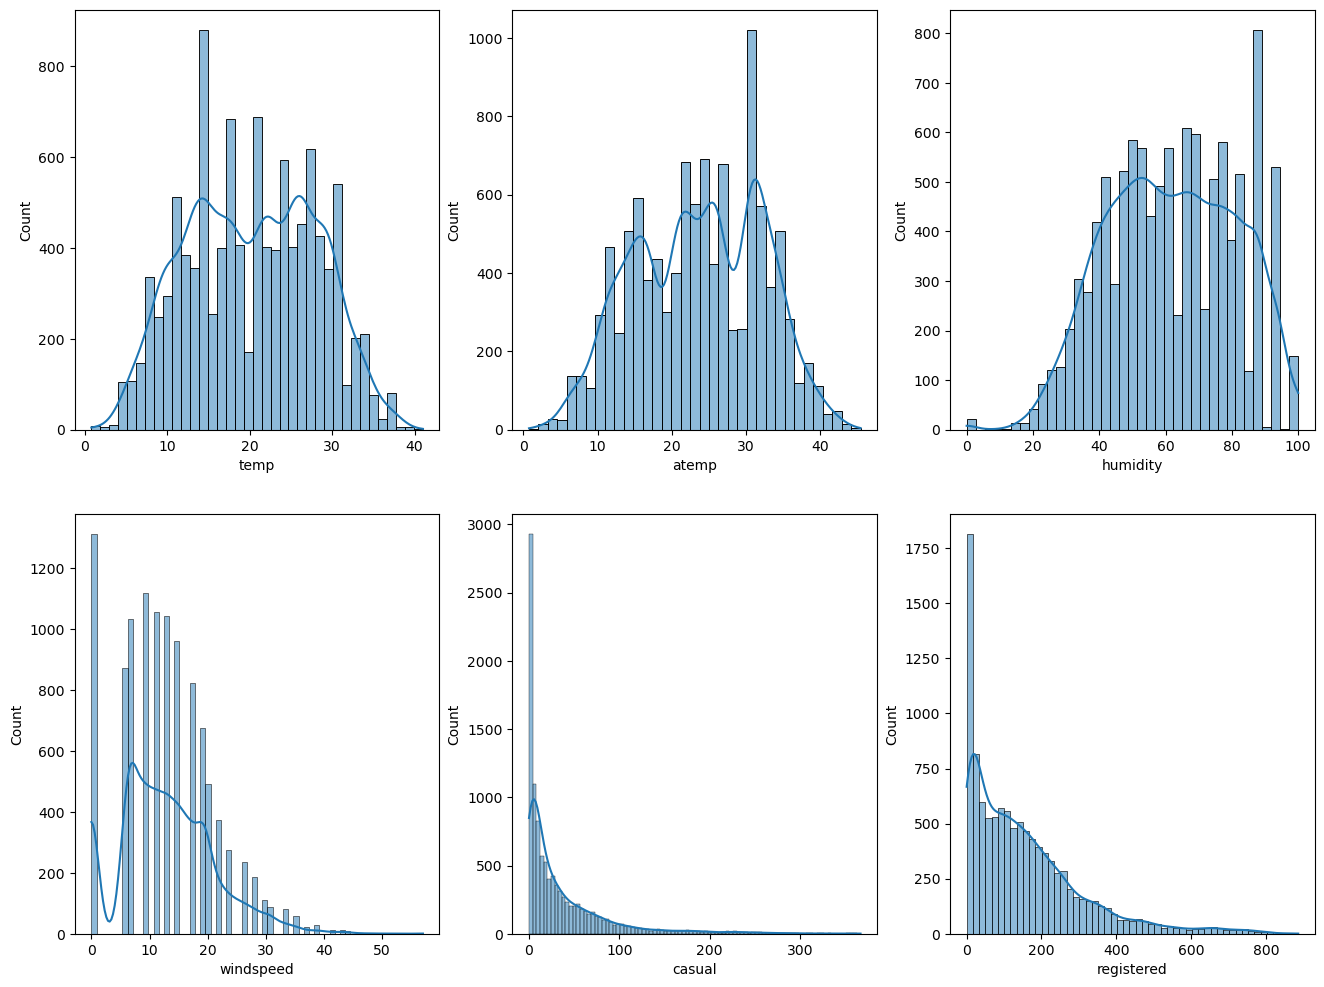

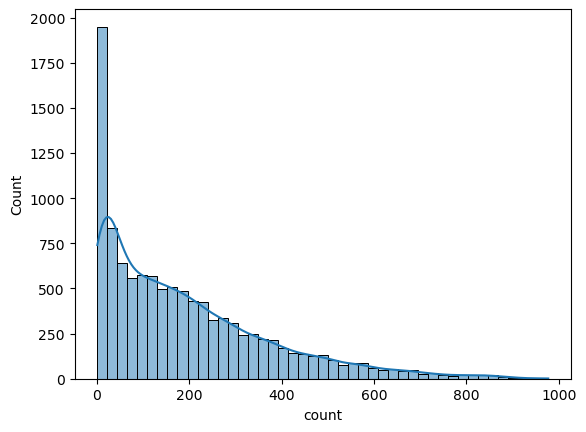

In [36]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
# Extra 1 graph of Total is plotted outside of the subplots for clear visualization.
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

- casual, registered and count somewhat looks like Log Normal Distribution
- temp, atemp and humidity looks like they follows the Normal Distribution
- windspeed follows the binomial distribution

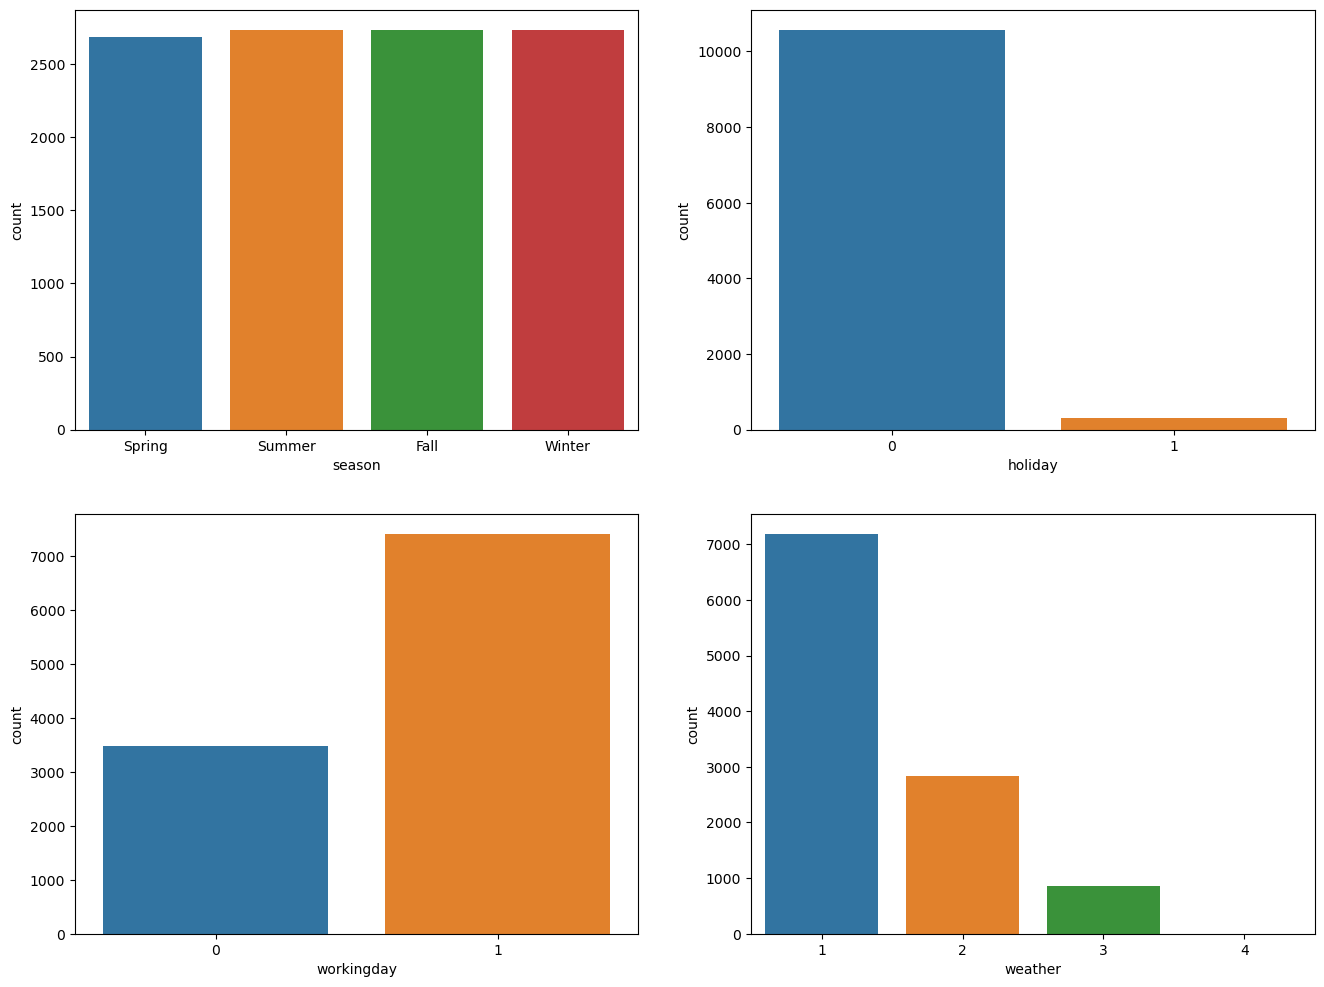

In [37]:
# countplot of each categorical column

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Data looks usual, all seasons having almost same number of days, weather patters is mostly Clear or Few clouds or partly cloudy or partly cloudy which is expected in a tropical country like India.

In [61]:
'''Checking outliers and distributions'''

'Checking outliers and distributions'

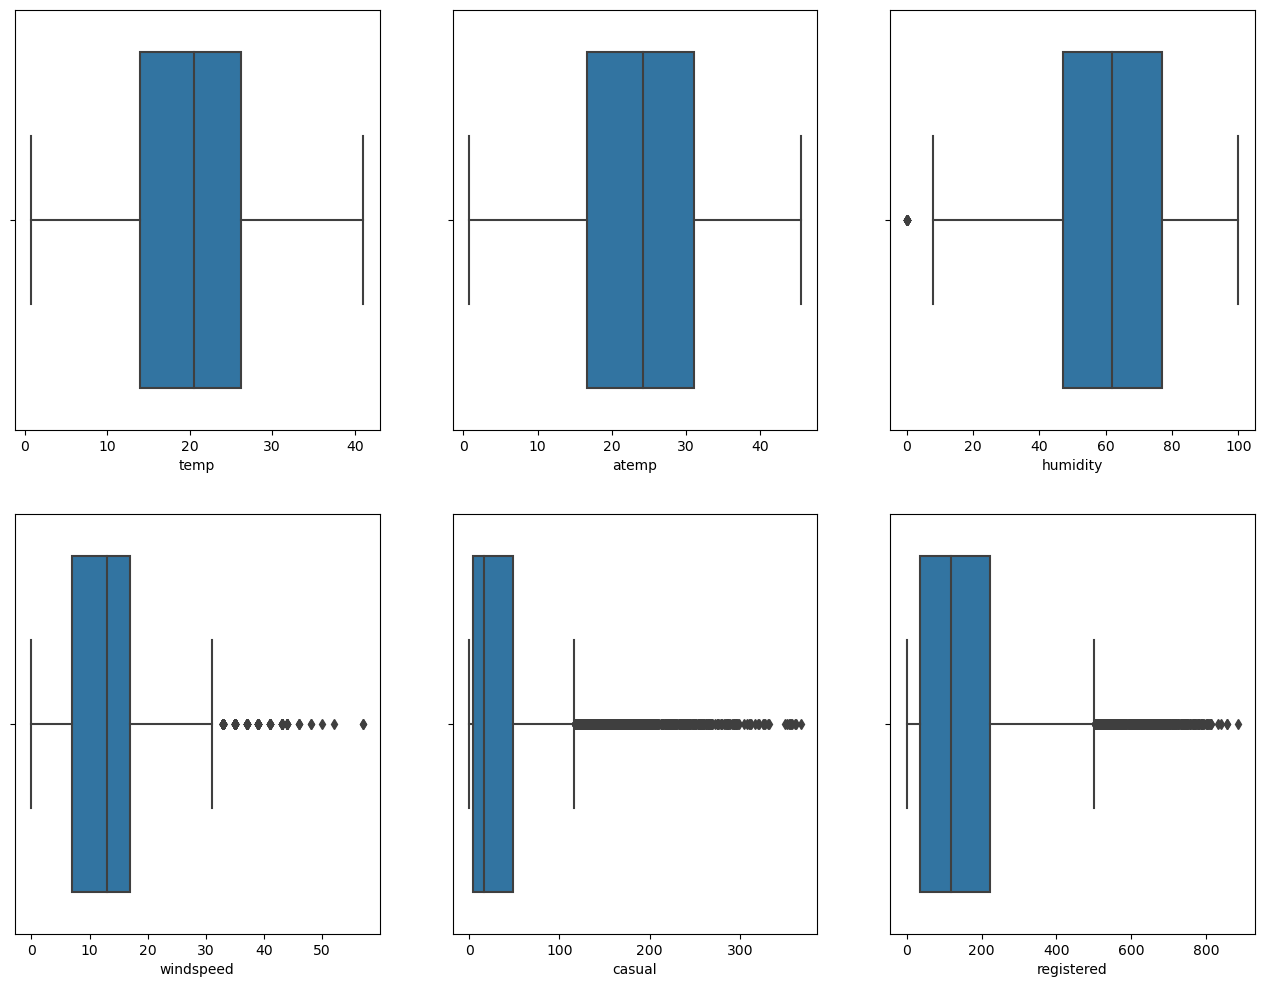

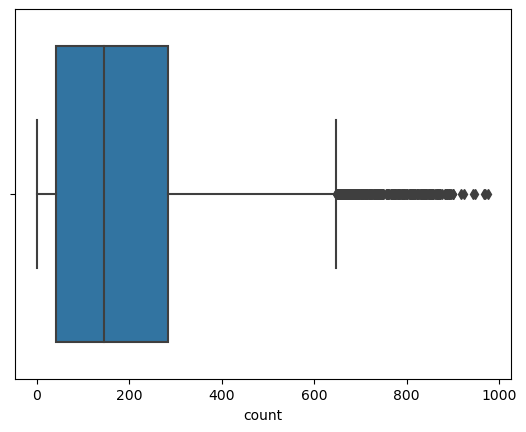

In [38]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

We can see many outliers in windspeed, casual, registered and total columns.

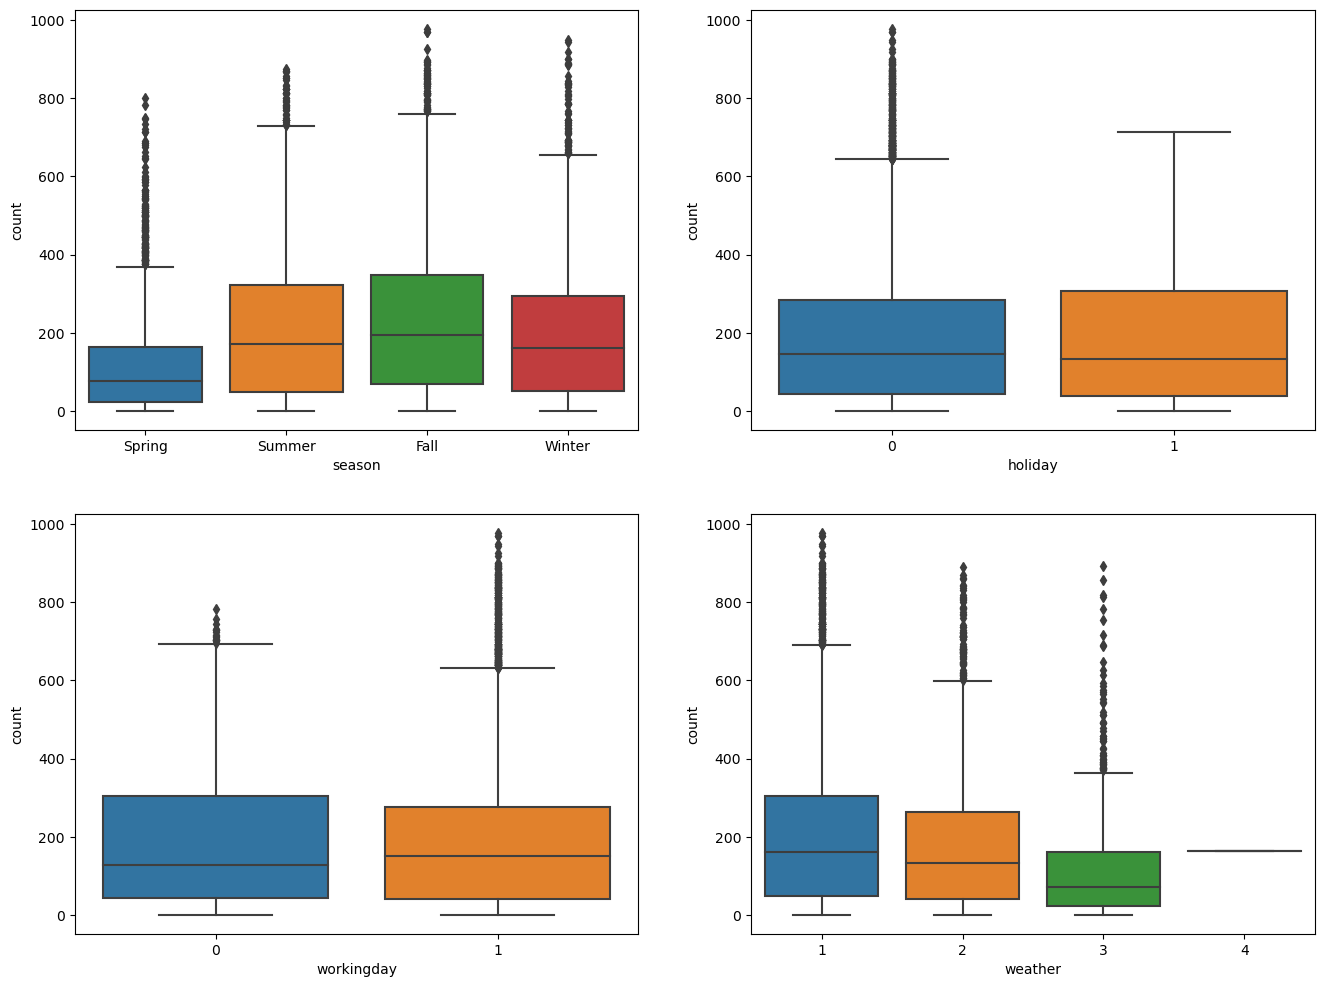

In [39]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

- During the seasons of summer and fall, we see more bikes being rented.
- More bikes are rented on holidays.
- Also non-working days have more bikes being rented.
- Whenever there is rain, thunderstorm, snow or fog, less bikes were rented.

[]

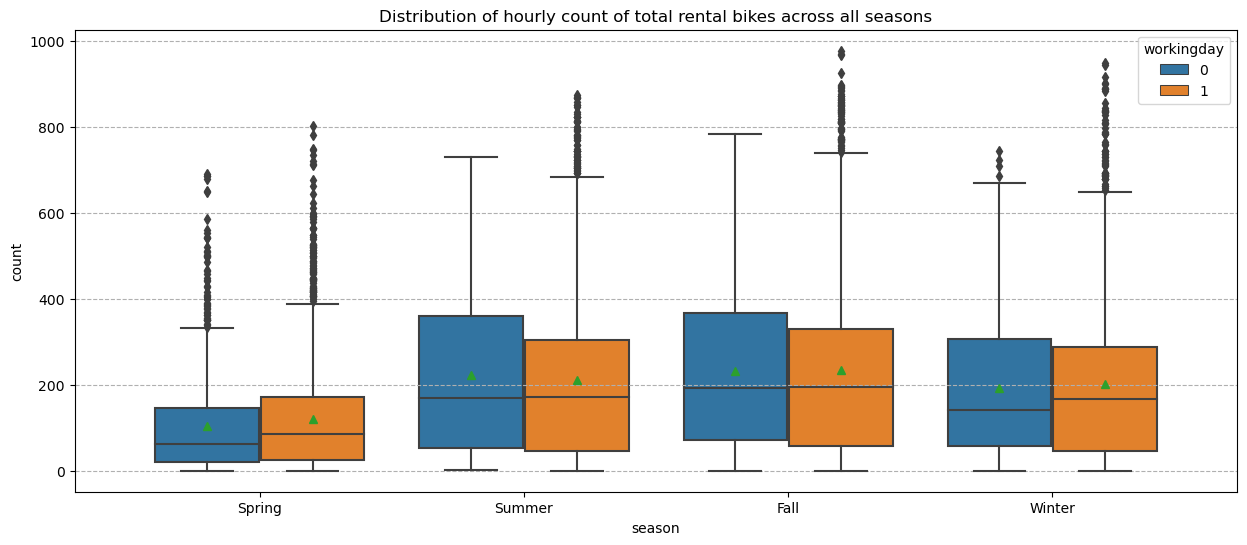

In [40]:
# Distribution of the hourly count of total rented bike across all seasons.
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

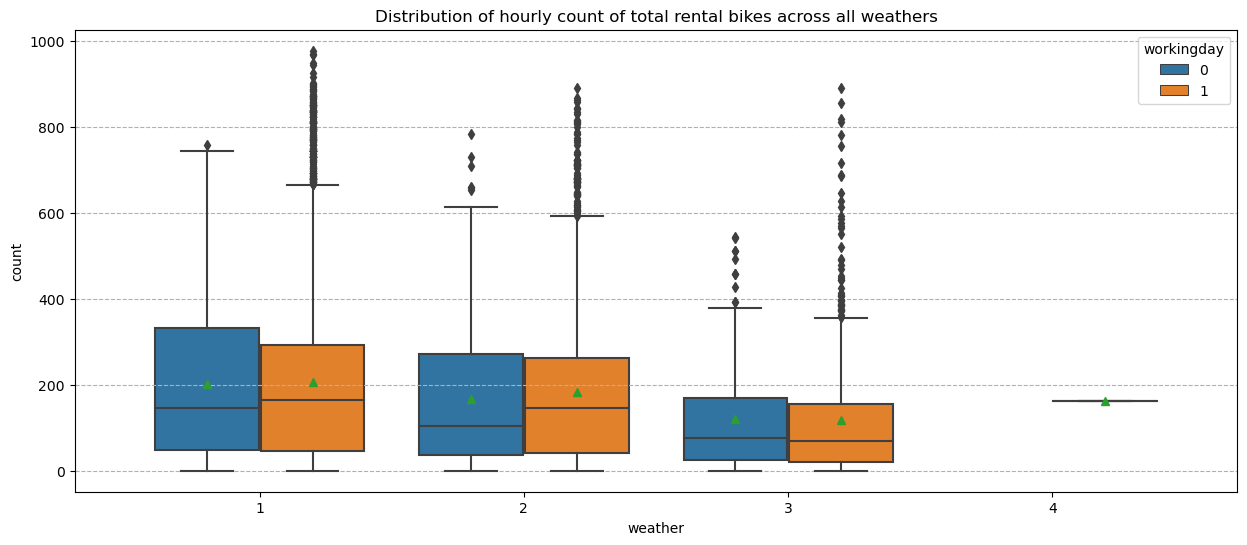

In [41]:
# Distribution of the hourly count of total rented bikes across all weathers.
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

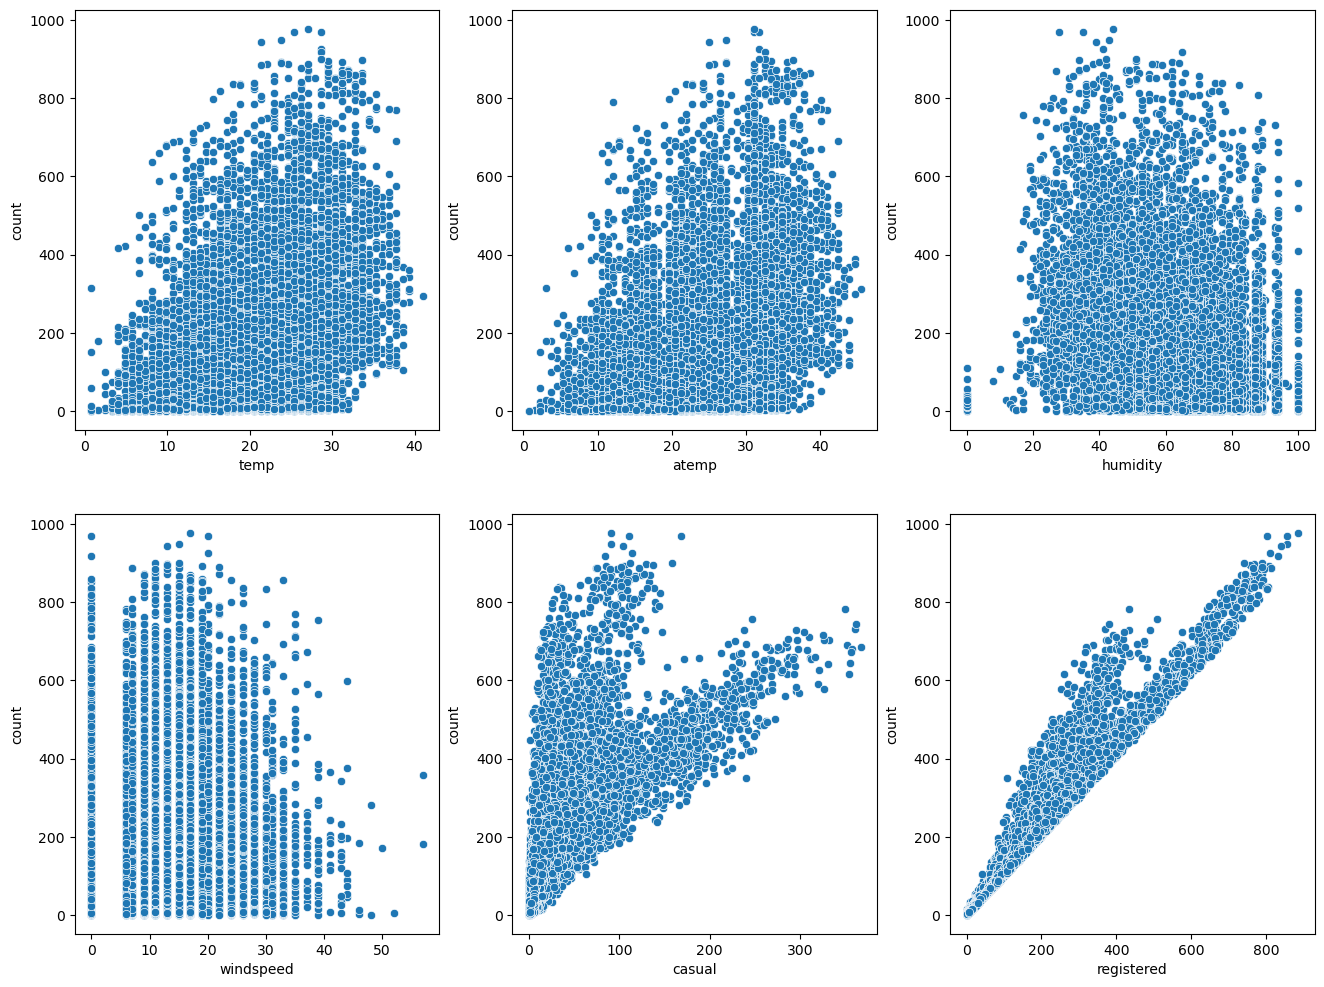

In [42]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

- When humidity was less that 20, Bikes rented were very low.
- When temp and atemp were less than 10 degree celcius, the no of bikes rented were very less.
- When the windspeed was more that 35, no of bikes rented were less.

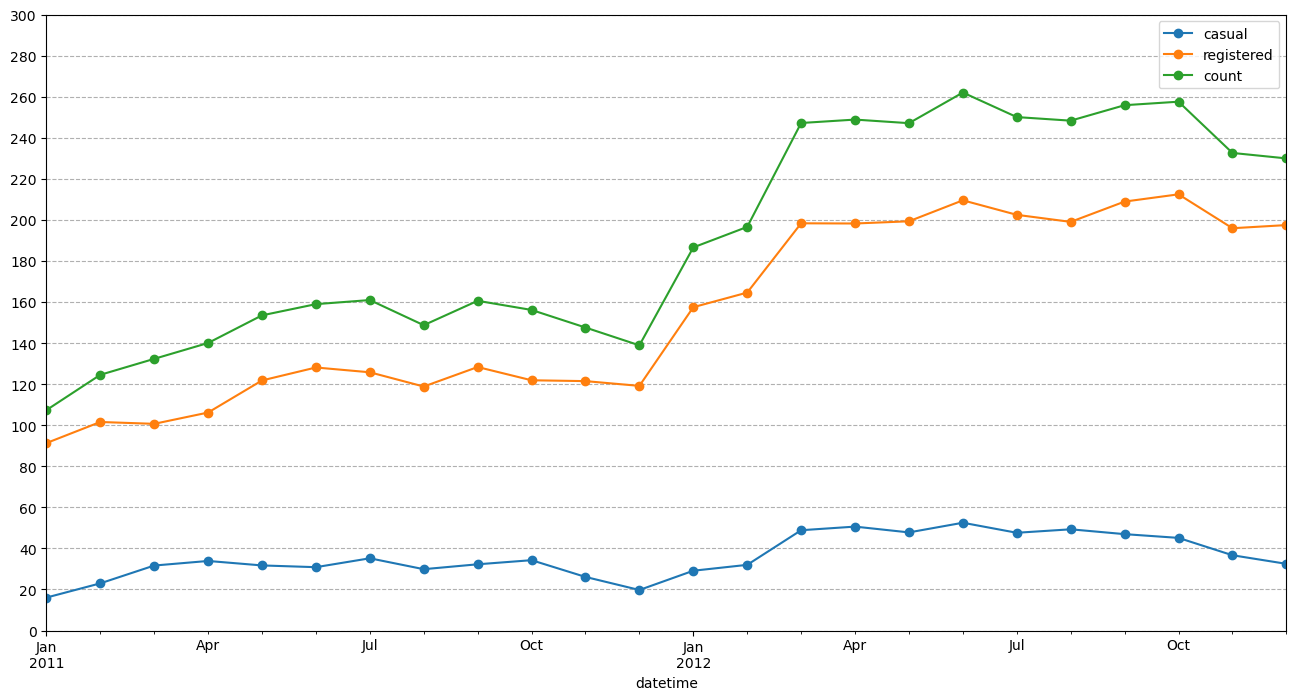

In [43]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered', 
    # and 'total' variables.
    
plt.figure(figsize = (16, 8))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value 
    # of 'casual', 'registered' and 'total' users for each month
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'total', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()     

Monthly average users suddenly raised from Dec 2011 and rise was significant upto March 2012.

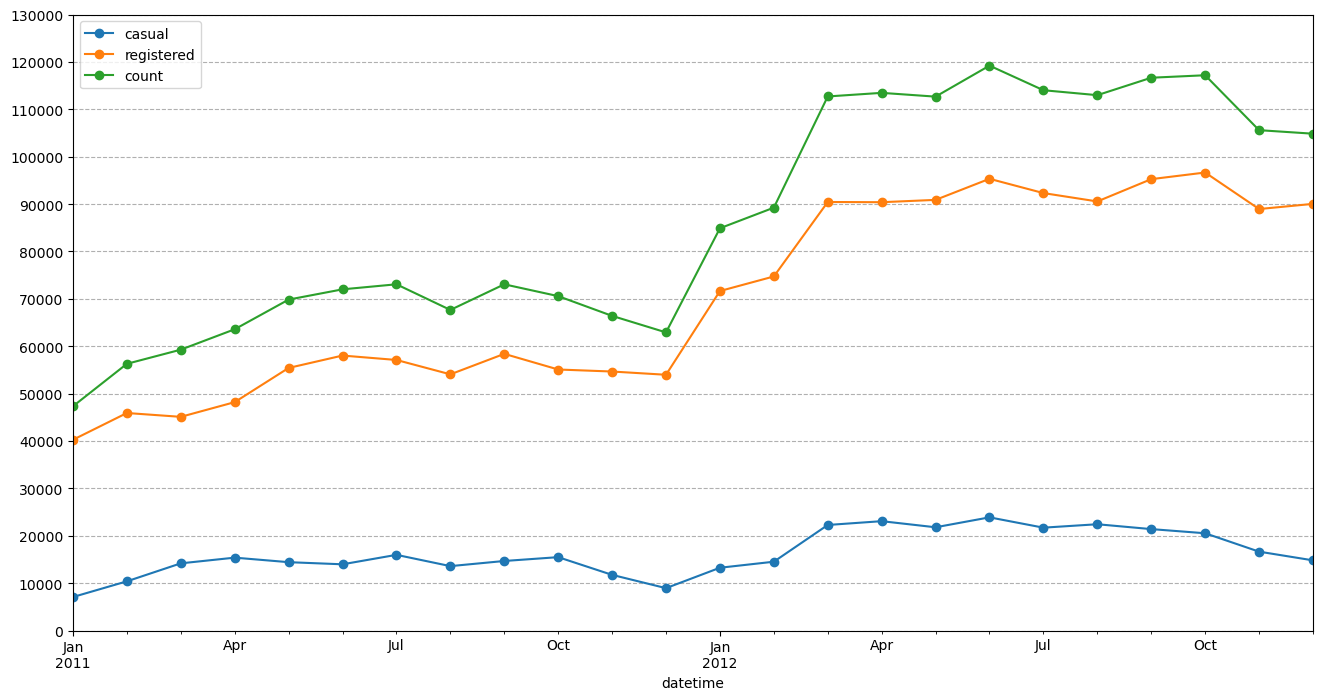

In [44]:
# The below code visualizes the trend of the monthly total values for the 'casual', 'registered', 
    # and 'count' variables,  allowing for easy comparison and analysis of their patterns over time

plt.figure(figsize = (16, 8))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the sum
    # of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')   
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)        # setting the lower y-axis limit to 0
plt.show()         

In [45]:
# To see how average hourly count of rental bikes varies across different months.
df.reset_index(inplace = True)
# Grouping the DataFrame by the month 
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up 
    # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

count  prev_count  growth_percent
month                                        
1      147.570312         NaN             NaN
2      160.628035  147.570312        8.848475
3      190.245575  160.628035       18.438587
4      194.554945  190.245575        2.265162
5      200.340285  194.554945        2.973628
6      210.592511  200.340285        5.117406
7      205.596703  210.592511       -2.372263
8      198.501099  205.596703       -3.451225
9      208.260154  198.501099        4.916373
10     207.004410  208.260154       -0.602969
11     190.263274  207.004410       -8.087333
12     184.558856  190.263274       -2.998171

- Only in first 2 months of the year i.e. in Jan to March, the growth of average hourly count of rental bikes was positive and significant.
- In the months of March to May the growth was almost flat and slightly increased from May to June.
- From June to August, the growth was slightly -ve.
- From August to Sept, growth was slightly +ve again.
- From Sept to Dec, the growth was again -ve and the growth dropped the most in the period of Oct-Nov.

[]

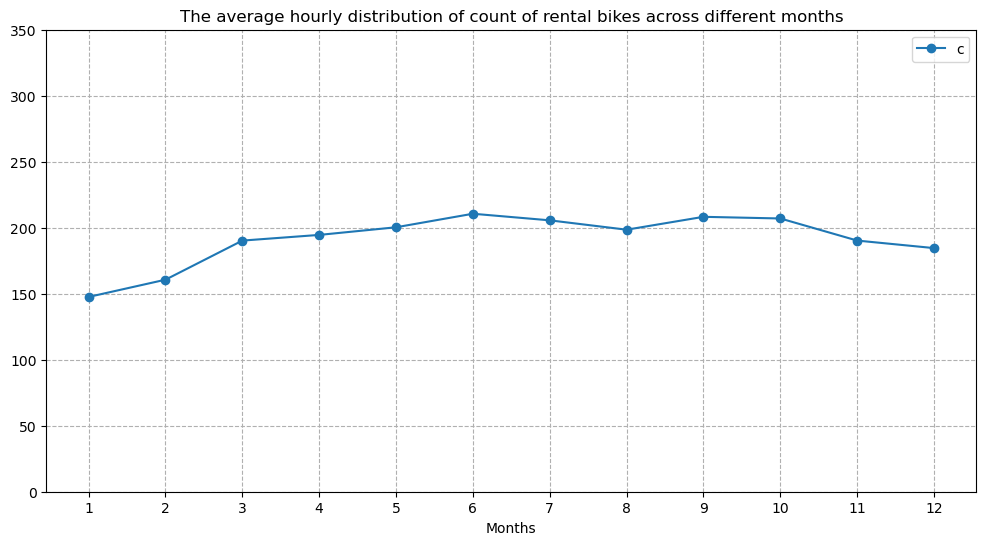

In [46]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each 
    # month, allowing for comparison and identification of any patterns or trends throughout the year.

# Setting the figure size for the plot
plt.figure(figsize = (12, 6))

# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")

# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month. 
    # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.xlabel('Months')
plt.ylim(0,)    # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13))   # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count')    # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot()     # Displaing the plot.

- The average hourly count of rental bikes is the highest in the month of June followed by September and October.
- The average hourly count of rental bikes is the lowest in the month of January followed by February and December.
- Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the fall and summer months, a slight decline in the winter, and a further decrease in the spring seasonal months. 
- It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.

In [47]:
# Grouping the DataFrame by the hour
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up 
    # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

count  prev_count  growth_percent
hour                                        
0      55.138462         NaN             NaN
1      33.859031   55.138462      -38.592718
2      22.899554   33.859031      -32.367959
3      11.757506   22.899554      -48.656179
4       6.407240   11.757506      -45.505110
5      19.767699    6.407240      208.521293
6      76.259341   19.767699      285.777526
7     213.116484   76.259341      179.462793
8     362.769231  213.116484       70.221104
9     221.780220  362.769231      -38.864655
10    175.092308  221.780220      -21.051432
11    210.674725  175.092308       20.322091
12    256.508772  210.674725       21.755835
13    257.787281  256.508772        0.498427
14    243.442982  257.787281       -5.564393
15    254.298246  243.442982        4.459058
16    316.372807  254.298246       24.410141
17    468.765351  316.372807       48.168661
18    430.859649  468.765351       -8.086285
19    315.278509  430.859649      -26.825705
20    228.517544  315.278509      -27.518833
21    173.370614  228.517544      -24.132471
22    133.576754  173.370614      -22.953059
23     89.508772  133.576754      -32.990757

- During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66% which is expected.
- However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
- The count continues to rise significantly with slight fluctuations until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
- After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

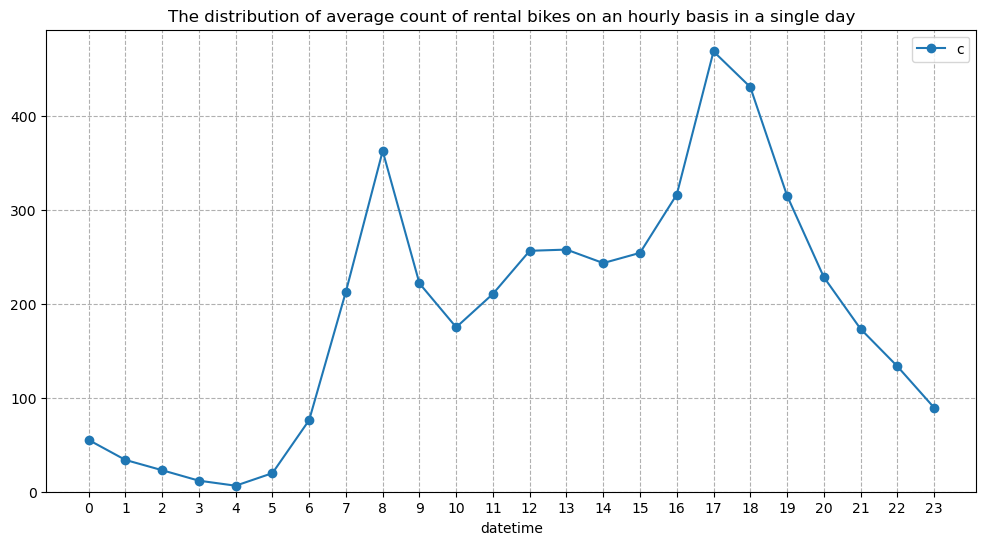

In [48]:
# plotting the above trend of hourly variation.
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

- The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
- The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.
-----------
These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

In [75]:
df.head()

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00  Spring       0          0       1  9.02  13.635   
2 2011-01-01 02:00:00  Spring       0          0       1  9.02  13.635   
3 2011-01-01 03:00:00  Spring       0          0       1  9.84  14.395   
4 2011-01-01 04:00:00  Spring       0          0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count       date   weekday  
0        81        0.0       3          13     16 2011-01-01  Saturday  
1        80        0.0       8          32     40 2011-01-01  Saturday  
2        80        0.0       5          27     32 2011-01-01  Saturday  
3        75        0.0       3          10     13 2011-01-01  Saturday  
4        75        0.0       0           1      1 2011-01-01  Saturday

[]

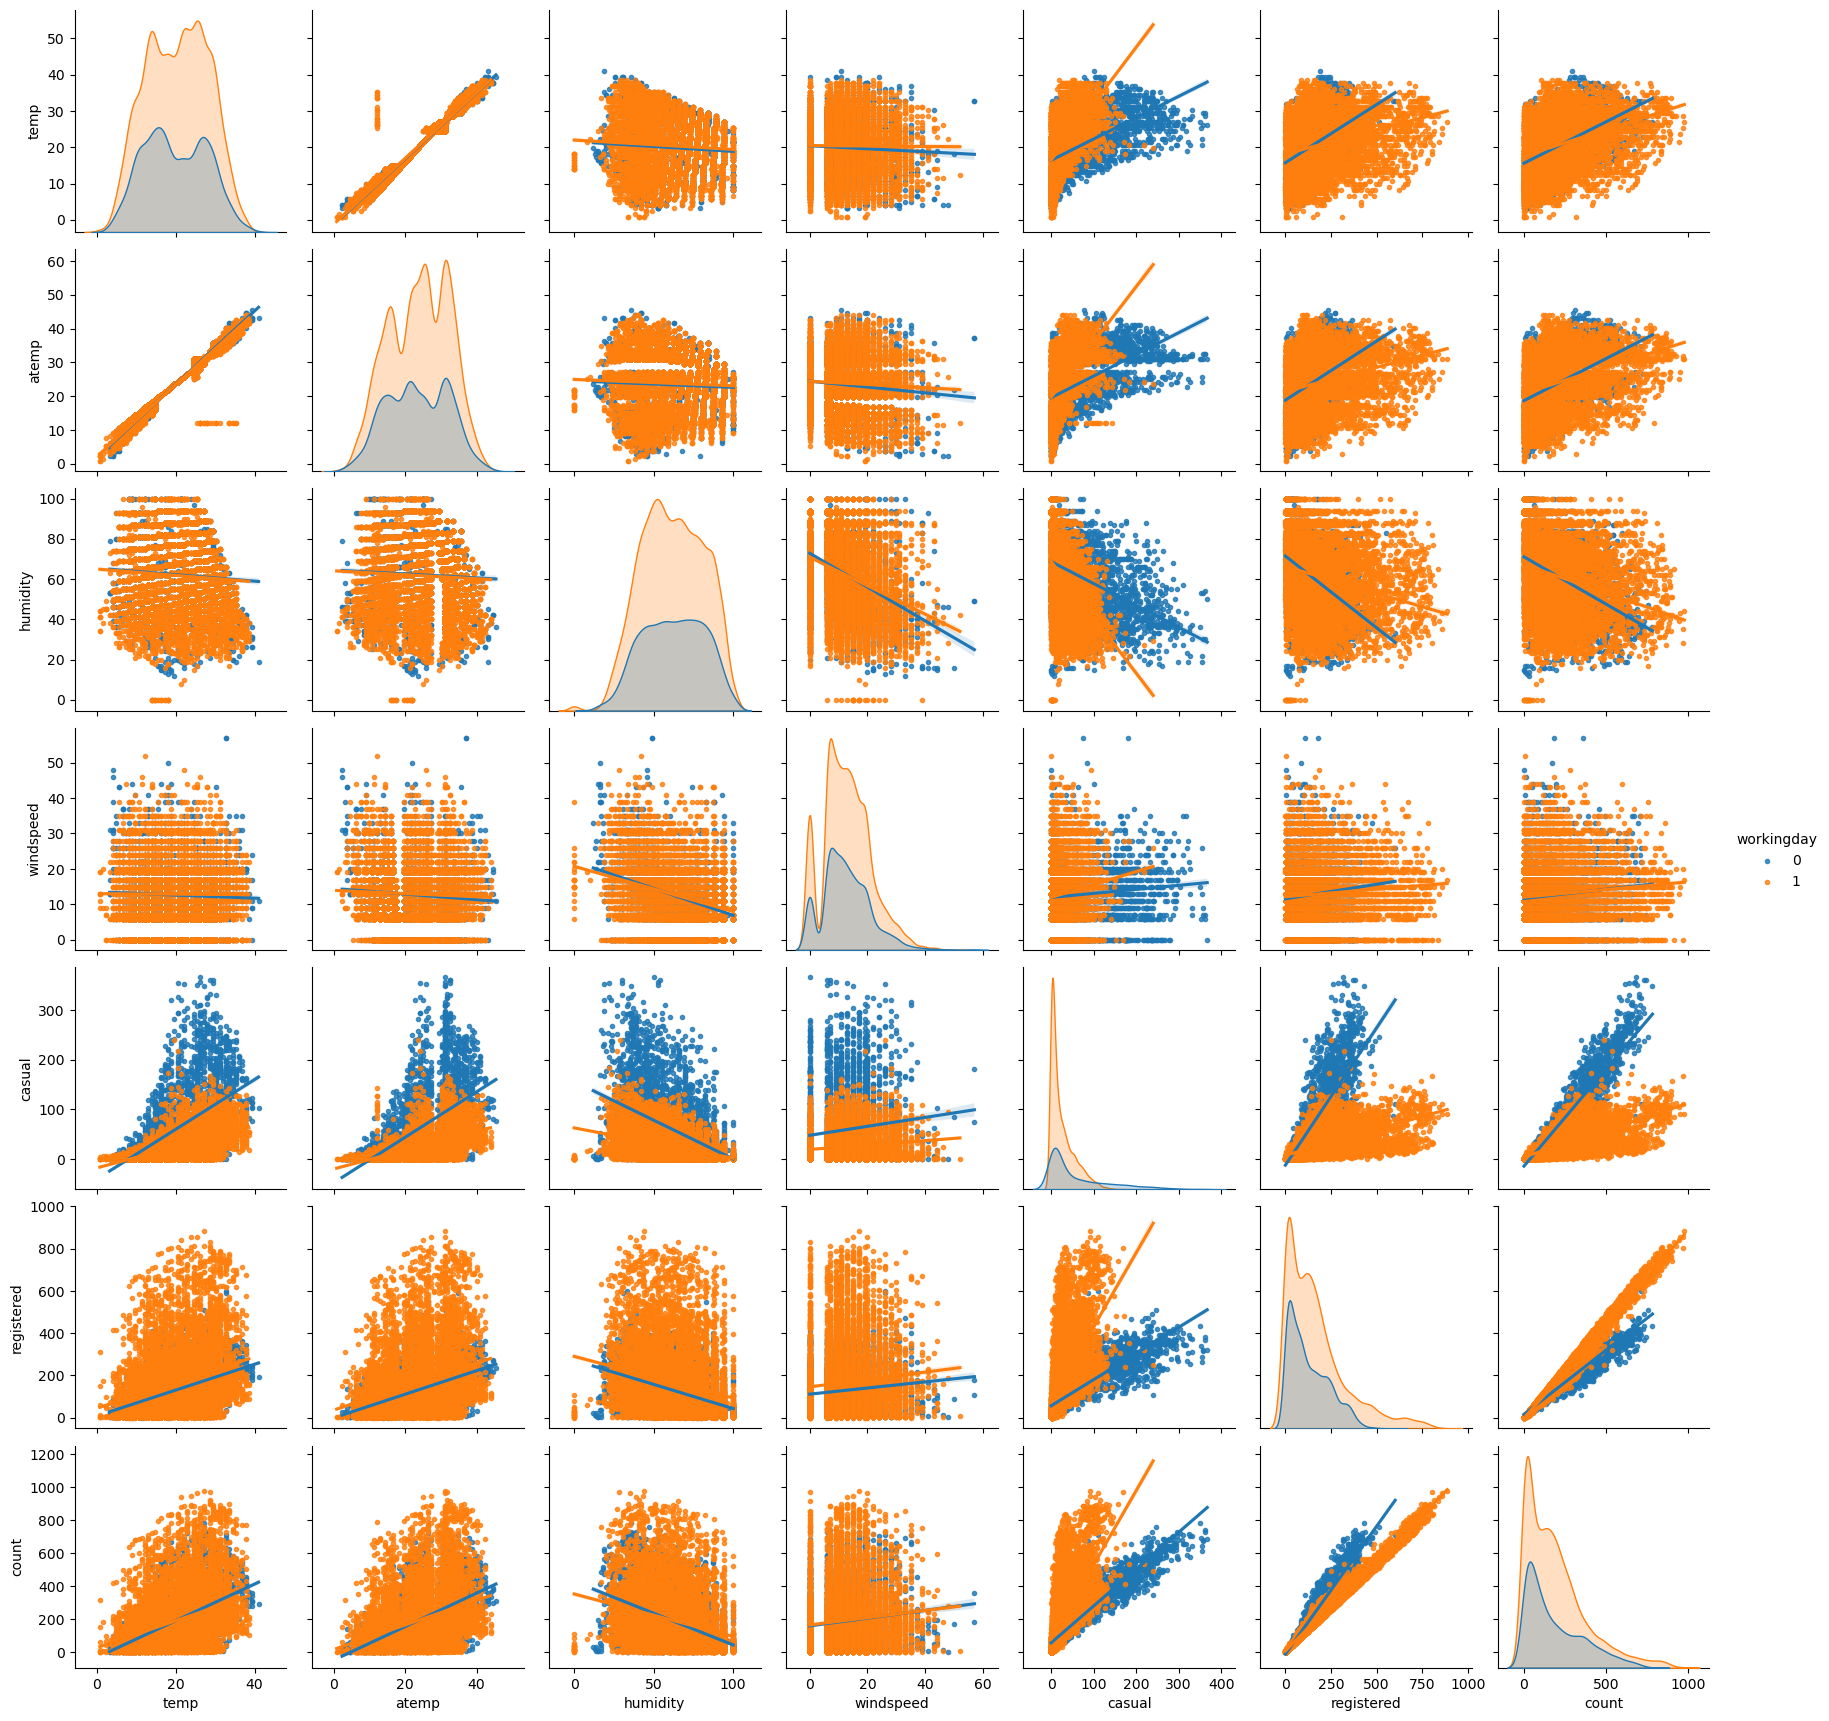

In [76]:
# Generating a pair plot to see the relation between different numerical attributes.
df1 = df[['temp','atemp','humidity','windspeed','casual','registered','count','workingday']]
sns.pairplot(data = df1, 
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

[]

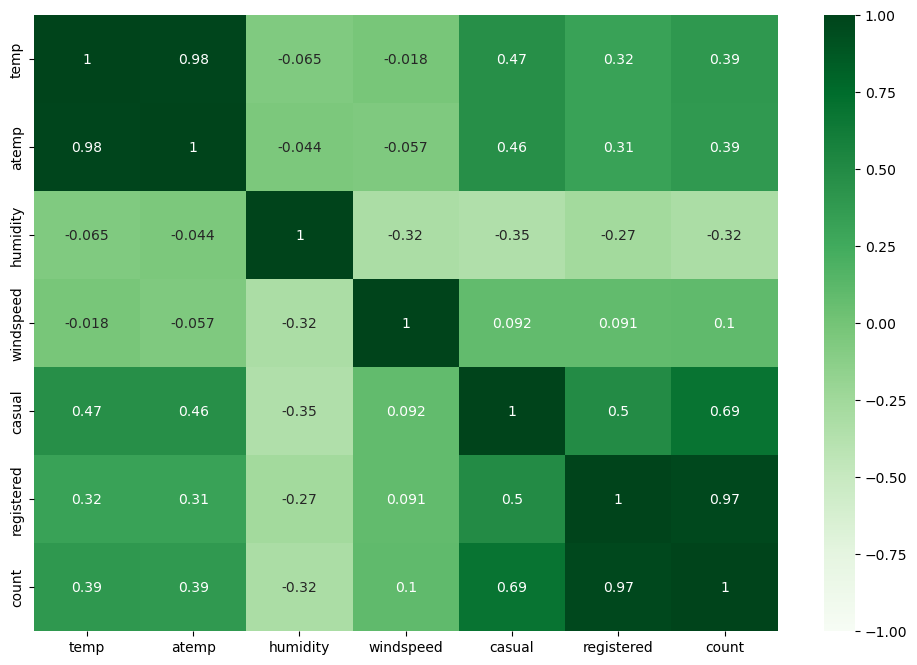

In [70]:
# Correlation matrix for all the numerical attributes.
corr_data = df.corr(numeric_only=True)
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

- Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
- High positive/negative correlation (0.7 - 0.9) does not exist between any other columns.
- Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
- Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
- Negligible correlation exists between all other combinations of columns.

[]

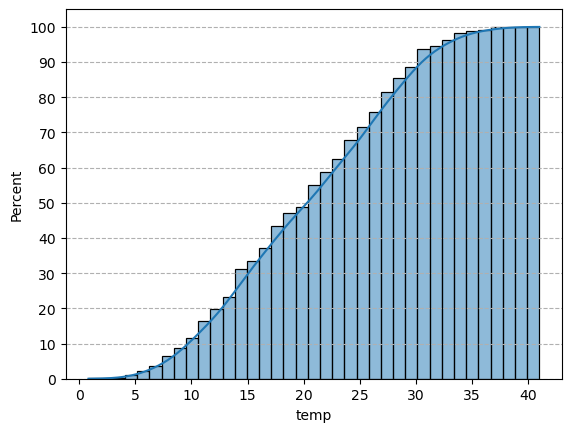

In [59]:
# Generating a histogram plot for the 'temp' feature, showing the cumulative distribution
 # of temperature values in the dataset.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       

- More than 80 % of the time, the temperature is less than 28 degrees celcius.

[]

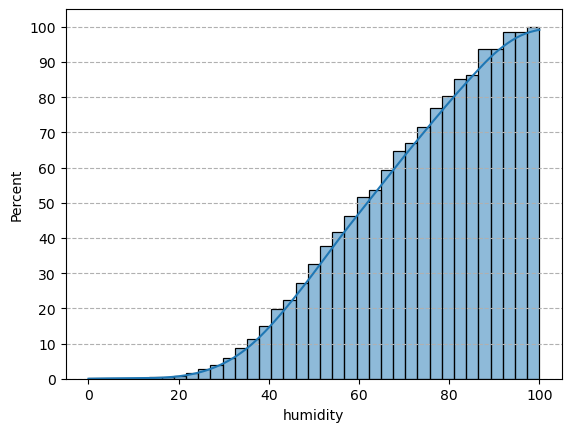

In [60]:
# Generating a histogram plot for the 'humidity' feature, showing the cumulative 
    # distribution of humidity values in the dataset. 

sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

- More than 80 % of the time, the humidity value is greater than 42. Thus for most of the time, humidity level varies from optimum to too moist.

[]

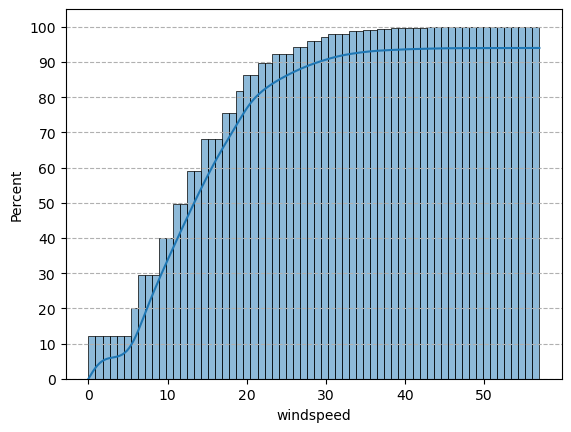

In [62]:
# Generating a histogram plot for the 'windspeed' feature, showing the cumulative 
    # distribution of windspeed values in the dataset. 
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()    

- More than 85 % of the total windspeed data has a value of less than 20.

[]

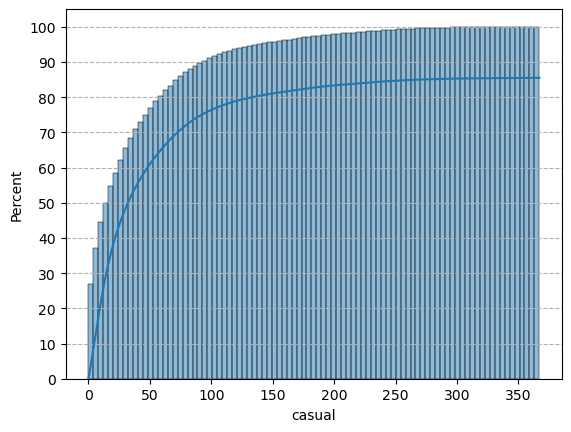

In [63]:
# Generating a histogram plot for the 'casual users', showing the cumulative 
    # distribution of casual users values in the dataset. 
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot() 

- More than 80 % of the time, the count of casual users is less than 60.

[]

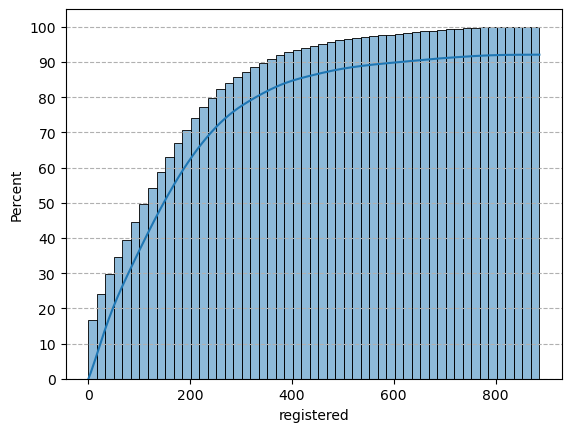

In [64]:
# Generating a histogram plot for the 'registered users', showing the cumulative 
    # distribution of registered users values in the dataset. 
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       

- More than 85 % of the time, the count of registered users is less than 300.

-------

## 4. Hypothesis testing

### 4.1. Checking if there any significant difference between the no. of bike rides on Weekdays and Weekends.

In [77]:
df.groupby(by = 'workingday')['count'].describe()

count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

[]

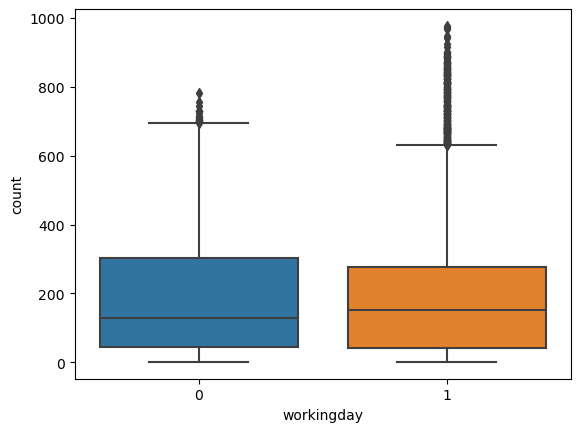

In [78]:
# 
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

**STEP-1** : Defining Null and Alternate Hypothesis.

- Null Hypothesis(Ho) - Working Day does not have any effect on the number of electric cycles rented.

- Alternate Hypothesis(Ha) - Working Day has some effect on the number of electric cycles rented.
------------------------------------------------------
**STEP-2** : Checking for basic assumptions for the hypothesis.

- Distribution check using QQ Plot
- Homogeneity of Variances using Levene's test
----------------------------------------------------------
**STEP-3** : Defining Test statistics; Distribution of T under H0.

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
---------------------------------------
**STEP-4** : Computing the p-value and fix value of alpha.

- We set our alpha to be 0.05
---------------------------------------------------------
**STEP-5** : Comparing p-value and alpha.

- Based on p-value, we will accept or reject H0.
1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

**Checking for normal distribution using QQ plot.**

<Figure size 600x700 with 0 Axes>

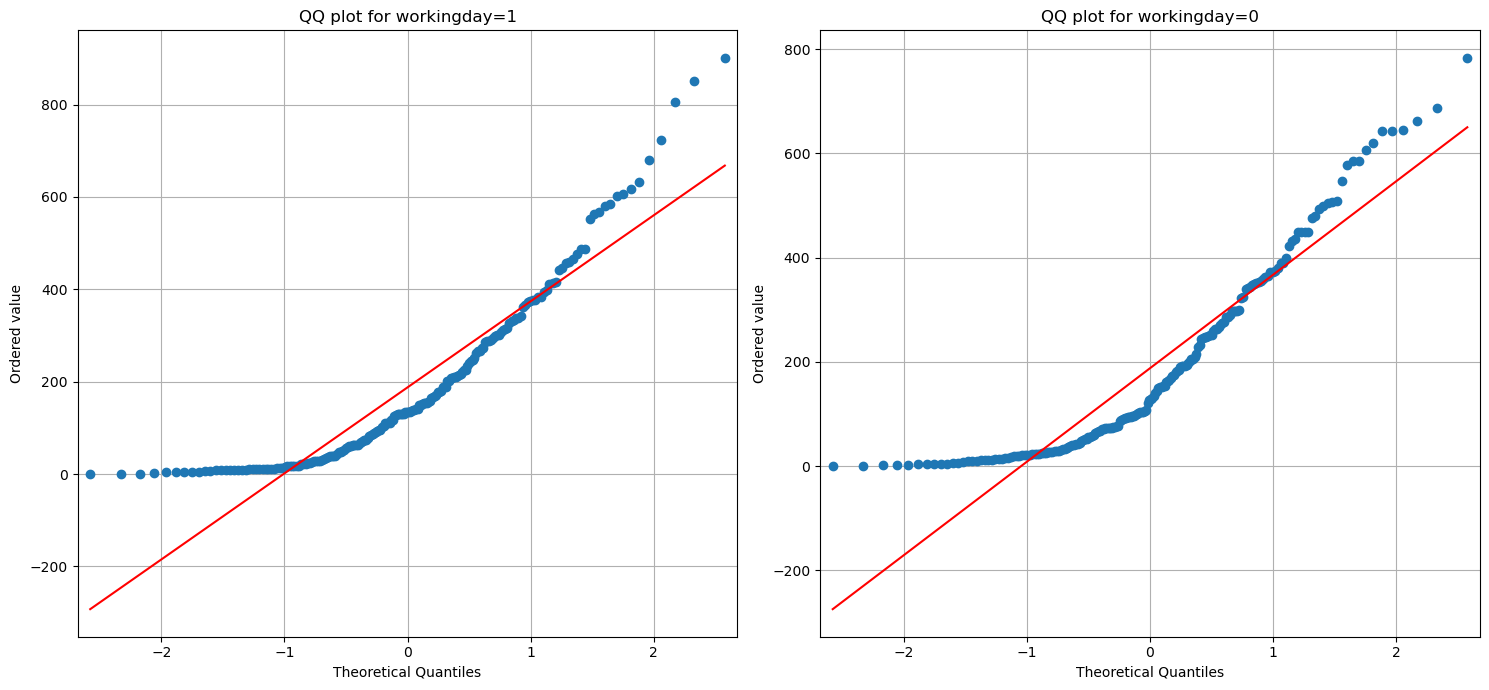

In [235]:
# Checking the normality of the distribution using QQ-plots
# QQ plot weather
from statsmodels.graphics.gofplots import qqplot

df1 = df.loc[df['workingday'] == 1, 'count'].sample(200)
df2 = df.loc[df['workingday'] == 0, 'count'].sample(200)
plt.figure(figsize=(6,7))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot QQ plots for each weather category
for i, (data, workday) in enumerate(zip([df1, df2], [1, 0])):
    ax = axes[i]
    qqplot(data, line='s', ax=ax)
    ax.set_title(f'QQ plot for workingday={workday}')
    ax.set_ylabel('Ordered value')
    ax.grid(True)

plt.tight_layout()
plt.show()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

**Checking for homogenous variance**

In [120]:
# Checking Homogeneity of Variances using Lavene's test.

from scipy.stats import levene

# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.5689524063282737
The samples have Homogenous Variance 


- So we can see that samples have homogenous variance but dont follow a normal distrubution. Since t-test assumes normal distribution and homogeneity of variances, we have atleast 1 condition fulfilling here. 

- Although t-test is not very suitable here and we can use non- parametric tests like Mann-Whitney U test but using t-test would still give us satisfactory results.

In [124]:
# Assuming normal distribution we can perform 2 sample independent t-test 
 # to check if the working day is having any effect on the no of users or not.
from scipy.stats import ttest_ind

# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05

test_stat, p_value = ttest_ind(df.loc[df['workingday'] == 1, 'count'], 
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.22644804226361348
Mean no.of electric cycles rented is same for working and non-working days


- Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

### 4.2. Checking if there any significant difference between the no. of bike rides on Holidays and non-holidays.

In [125]:
df.groupby(by = 'holiday')['count'].describe()

count        mean         std  min   25%    50%    75%    max
holiday                                                                 
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0

[]

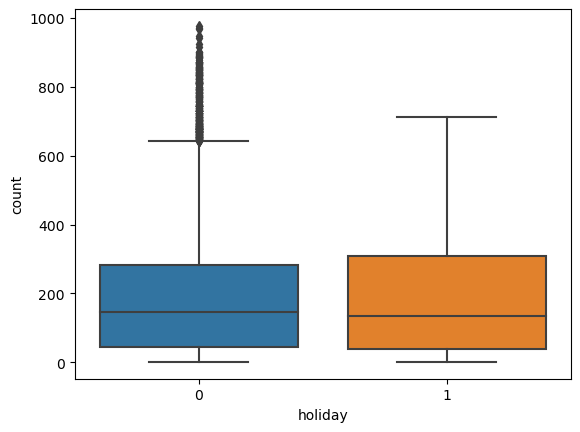

In [126]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

**STEP-1** : Defining Null and Alternate Hypothesis.

- Null Hypothesis(Ho) - Holiday does not have any effect on the number of electric cycles rented.

- Alternate Hypothesis(Ha) - Holiday has some effect on the number of electric cycles rented.
------------------------------------------------------
**STEP-2** : Checking for basic assumptions for the hypothesis.

- Distribution check using QQ Plot
- Homogeneity of Variances using Levene's test
----------------------------------------------------------
**STEP-3** : Defining Test statistics; Distribution of T under H0.

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
---------------------------------------
**STEP-4** : Computing the p-value and fix value of alpha.

- We set our alpha to be 0.05
---------------------------------------------------------
**STEP-5** : Comparing p-value and alpha.

- Based on p-value, we will accept or reject H0.
1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

**a. Checking for normality using QQ-plot.**

<Figure size 600x700 with 0 Axes>

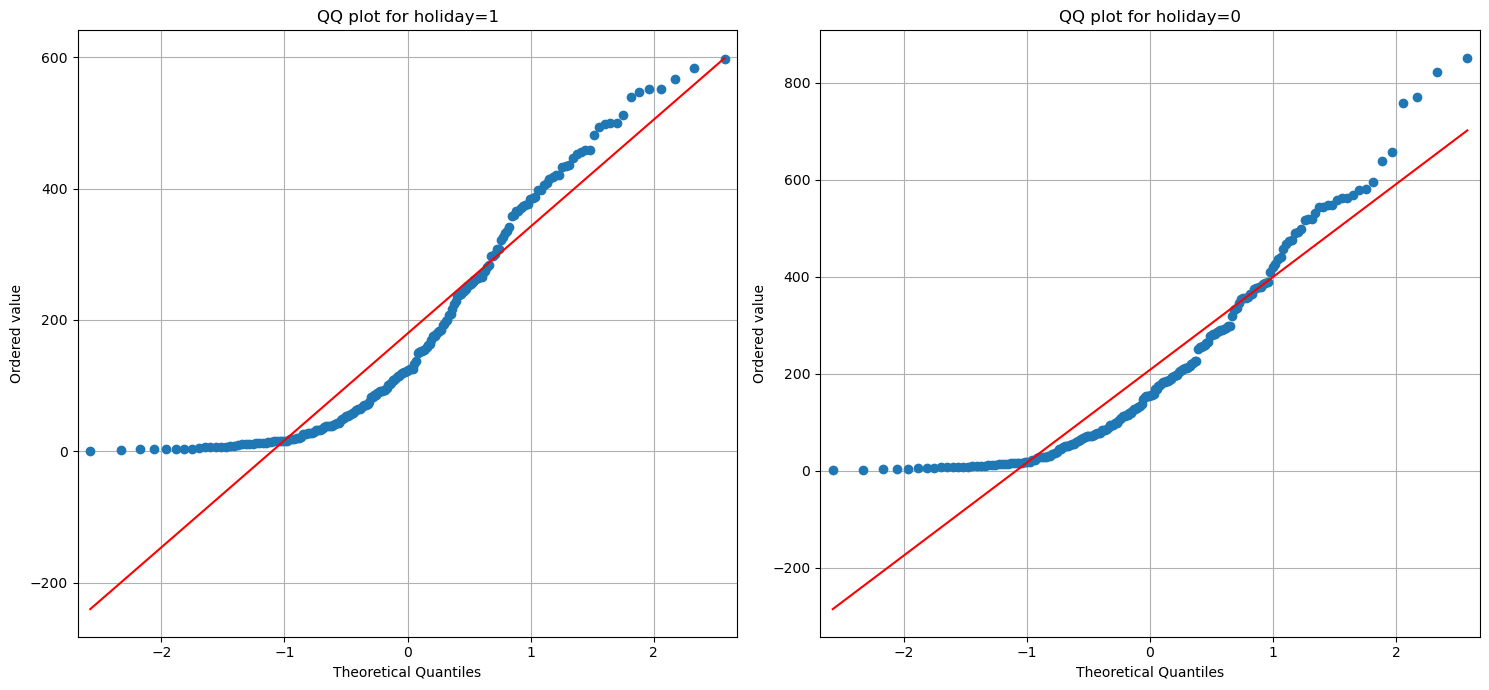

In [199]:
# Checking the normality of the distribution using QQ-plots
# QQ plot weather
from statsmodels.graphics.gofplots import qqplot

dt1 = df.loc[df['holiday'] == 1, 'count'].sample(200)
dt2 = df.loc[df['holiday'] == 0, 'count'].sample(200)
plt.figure(figsize=(6,7))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot QQ plots for each weather category
for i, (data, holidayy) in enumerate(zip([dt1, dt2], [1, 0])):
    ax = axes[i]
    qqplot(data, line='s', ax=ax)
    ax.set_title(f'QQ plot for holiday={holidayy}')
    ax.set_ylabel('Ordered value')
    ax.grid(True)

plt.tight_layout()
plt.show()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

**b. Checking for normality using Shapiro test**

In [130]:
# Applying Shapiro-Wilk test toc check the normality.

from scipy.stats import shapiro

#  Ho: The sample follows normal distribution 
#  Ha: The sample does not follow normal distribution

alpha = 0.05
# For holiday
test_stat, p_value = shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
    
# For non-holiday
test_stat, p_value = shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2863982101762872e-10
The sample does not follow normal distribution
p-value 1.835470664346417e-10
The sample does not follow normal distribution


**So the distribution doesnt follow the normal distribution.**

**Checking for Homogeneity of variances using Levene's test**

In [131]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6030123797864397
The samples have Homogenous Variance 


- So we can see that samples have homogenous variance but dont follow a normal distrubution. Since t-test assumes normal distribution and homogeneity of variances, we have atleast 1 condition fulfilling here. 

- Although t-test is not very suitable here and we can use non- parametric tests like Mann-Whitney U test but using t-test would still give us satisfactory results.

In [135]:
# Assuming normal distribution we can perform 2 sample independent t-test 
 # to check if the holiday is having any effect on the no of users or not.
from scipy.stats import ttest_ind

# Ho : No of electric cycles rented is same for working and non-working days
# Ha : No of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05

test_stat, p_value = ttest_ind(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No of electric cycles rented is not similar for holidays and non-holidays')
else:
    print('No of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.41751352385910967
No of electric cycles rented is similar for holidays and non-holidays


- Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

### 4.3. Checking if the weather has any significant effect on the no. of bikes rented.

In [136]:
df.groupby(by = 'weather')['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

[]

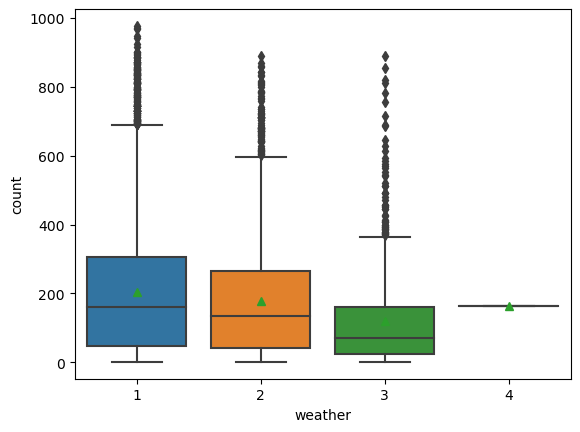

In [137]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [138]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

**Since the weather condition 4 is having only 1 record, we can ignore that.**

**STEP-1** : Defining Null and Alternate Hypothesis.

- Null Hypothesis(Ho) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

- Alternate Hypothesis(Ha) - Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.
------------------------------------------------------
**STEP-2** : Checking for basic assumptions for the hypothesis.

- Distribution check using QQ Plot or kurtosis or Skewness.
- Homogeneity of Variances using Levene's test
----------------------------------------------------------
**STEP-3** : Defining Test statistics; Distribution of T under H0.

- If the assumptions of One-way ANOVA are met then we can proceed performing One-way ANOVA or else we can assume the conditions are met and can still perform One-way ANOVA test.
---------------------------------------
**STEP-4** : Computing the p-value and fix value of alpha.

- We set our alpha to be 0.05
---------------------------------------------------------
**STEP-5** : Comparing p-value and alpha.

- Based on p-value, we will accept or reject H0.
1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

In [175]:
'''Checking for normality'''

'Checking for normality'

**a. Checking for normality using Kurtosis.**

In [204]:
# firstly checking the normality using Kurtosis.

from scipy.stats import kurtosis

for i in range(1,4):
# Calculation of kurtosis
    data_kurtosis = kurtosis(df[df['weather'] == i]['count'])

    # Print the kurtosis value
    print(f'Kurtosis for weather={i}:', data_kurtosis)

Kurtosis for weather=1: 0.9632151489948488
Kurtosis for weather=2: 1.5835130178554868
Kurtosis for weather=3: 5.961191782478394


- Positive kurtosis signals that the distribution is more peaked (leptokurtic) than a normal distribution.
- Tails of the distribution are heavier and there are more outliers.

**b. Checking for normality using QQ-plots**

<Figure size 600x700 with 0 Axes>

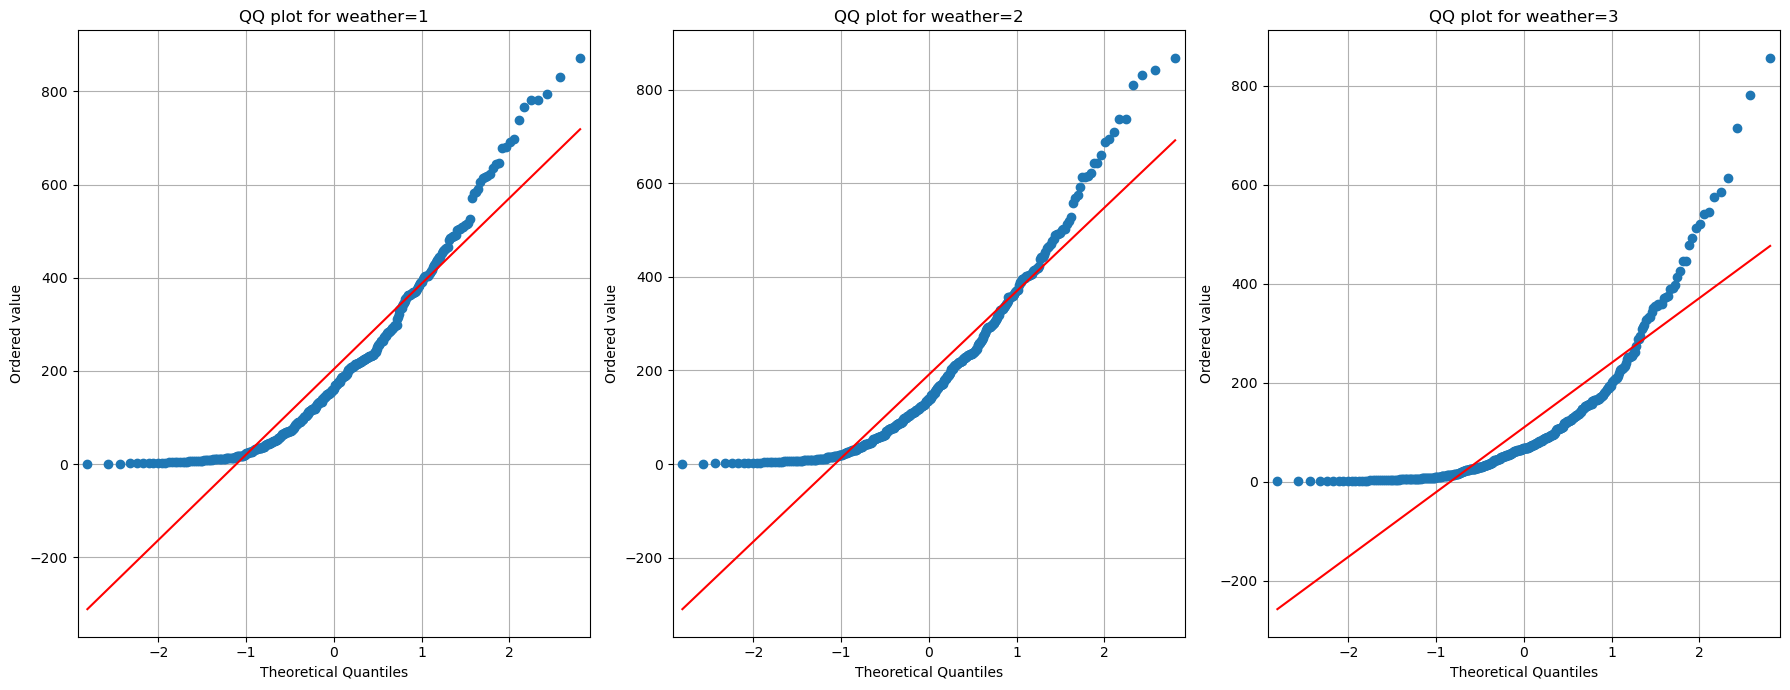

In [190]:
# Checking the distribution of count using QQ plot.

# QQ plot weather
from statsmodels.graphics.gofplots import qqplot

dt1 = df.loc[df['weather'] == 1, 'count'].sample(400)
dt2 = df.loc[df['weather'] == 2, 'count'].sample(400)
dt3 = df.loc[df['weather'] == 3, 'count'].sample(400)
plt.figure(figsize=(6,7))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plot QQ plots for each weather category
for i, (data, weather) in enumerate(zip([dt1, dt2, dt3], [1, 2, 3])):
    ax = axes[i]
    qqplot(data, line='s', ax=ax)
    ax.set_title(f'QQ plot for weather={weather}')
    ax.set_ylabel('Ordered value')
    ax.grid(True)

plt.tight_layout()
plt.show()

- It can be inferred from the above plots that all three weather are having the distributions that do not follow normal distribution pattern.

**c. Checking for normality using Skewness**

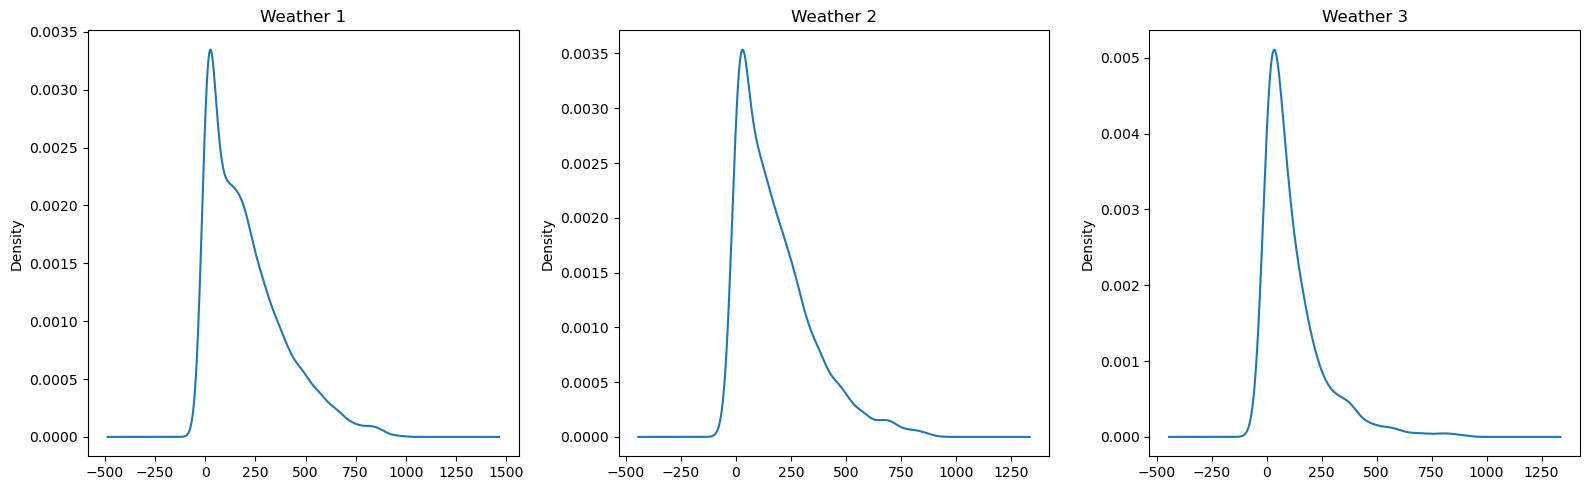

In [174]:
# Checking for normality of count for different weather conditions using Skewness.

data1 = df.loc[df['weather'] == 1, 'count']
data2 = df.loc[df['weather'] == 2, 'count']
data3 = df.loc[df['weather'] == 3, 'count']

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
data1.plot(kind='density', sharex=False)
plt.title('Weather 1')

plt.subplot(1, 3, 2)
data2.plot(kind='density', sharex=False)
plt.title('Weather 2')

plt.subplot(1, 3, 3)
data3.plot(kind='density', sharex=False)
plt.title('Weather 3')

plt.tight_layout()
plt.show()


- For all three weather patterns the dirtribution is positive skewed or right skewed which indicated the distribution is not normal.

**Checking for Homogeneity of Variances using Levene's test**

In [177]:
# Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(df_weather1.loc[:, 'count'].sample(400),
                                df_weather2.loc[:, 'count'].sample(400),
                                df_weather3.loc[:, 'count'].sample(400))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 8.72639533694571e-09
The samples do not have Homogenous Variance


- Since the samples are not normally distributed and do not have the Homogenous variance, One-way ANOVA test should not be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis test for independent samples. But we can still perform ANOVA assuming the notmal distribution.

**Performing One-way ANOVA test assuming conditions satisfied**

In [181]:
# Performing One-way ANOVA assuming normal distribution.
# Assuming significance= 0.05

from scipy.stats import f_oneway # Numeric Vs categorical for many categories.

data1 = df.loc[df['weather'] == 1, 'count']
data2 = df.loc[df['weather'] == 2, 'count']
data3 = df.loc[df['weather'] == 3, 'count']

# Ho: All groups have the same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(data1, data2, data3)

print("test statistic:",f_stats)
print("p_value:",p_value)

if p_value < 0.05:
    print("The mean number of rental bikes is statistically different for different weathers.")
else:
    print("The average number of rental bikes is statistically similar for different weathers.")

test statistic: 98.28356881946706
p_value: 4.976448509904196e-43
The mean number of rental bikes is statistically different for different weathers.


**Therefore, the average number of rental bikes is statistically different for different weathers.**

### 4.4. Checking if the season has any significant effect on the no. of bikes rented.

In [182]:
df.groupby(by = 'season')['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
Fall    2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
Spring  2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
Summer  2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
Winter  2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [184]:
df_season_spring = df.loc[df['season'] == 'Spring', 'count']
df_season_summer = df.loc[df['season'] == 'Summer', 'count']
df_season_fall = df.loc[df['season'] == 'Fall', 'count']
df_season_winter = df.loc[df['season'] == 'Winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

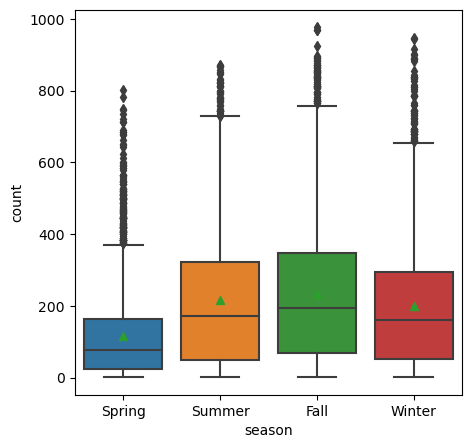

In [185]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

**STEP-1** : Defining Null and Alternate Hypothesis.

- Null Hypothesis(Ho) - Mean no. of cycles rented per hour is same for season 1,2,3 and 4.

- Alternate Hypothesis(Ha) - Mean no. of cycles rented per hour is different for season 1,2,3 and 4.
------------------------------------------------------
**STEP-2** : Checking for basic assumptions for the hypothesis.

- Distribution check using QQ Plot or kurtosis or Skewness.
- Homogeneity of Variances using Levene's test
----------------------------------------------------------
**STEP-3** : Defining Test statistics; Distribution of T under H0.

- If the assumptions of One-way ANOVA are met then we can proceed performing One-way ANOVA or else we can assume the conditions are met and can still perform One-way ANOVA test.
---------------------------------------
**STEP-4** : Computing the p-value and fix value of alpha.

- We set our alpha to be 0.05
---------------------------------------------------------
**STEP-5** : Comparing p-value and alpha.

- Based on p-value, we will accept or reject H0.
1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

**a. Checking for normality using QQ-plots.**

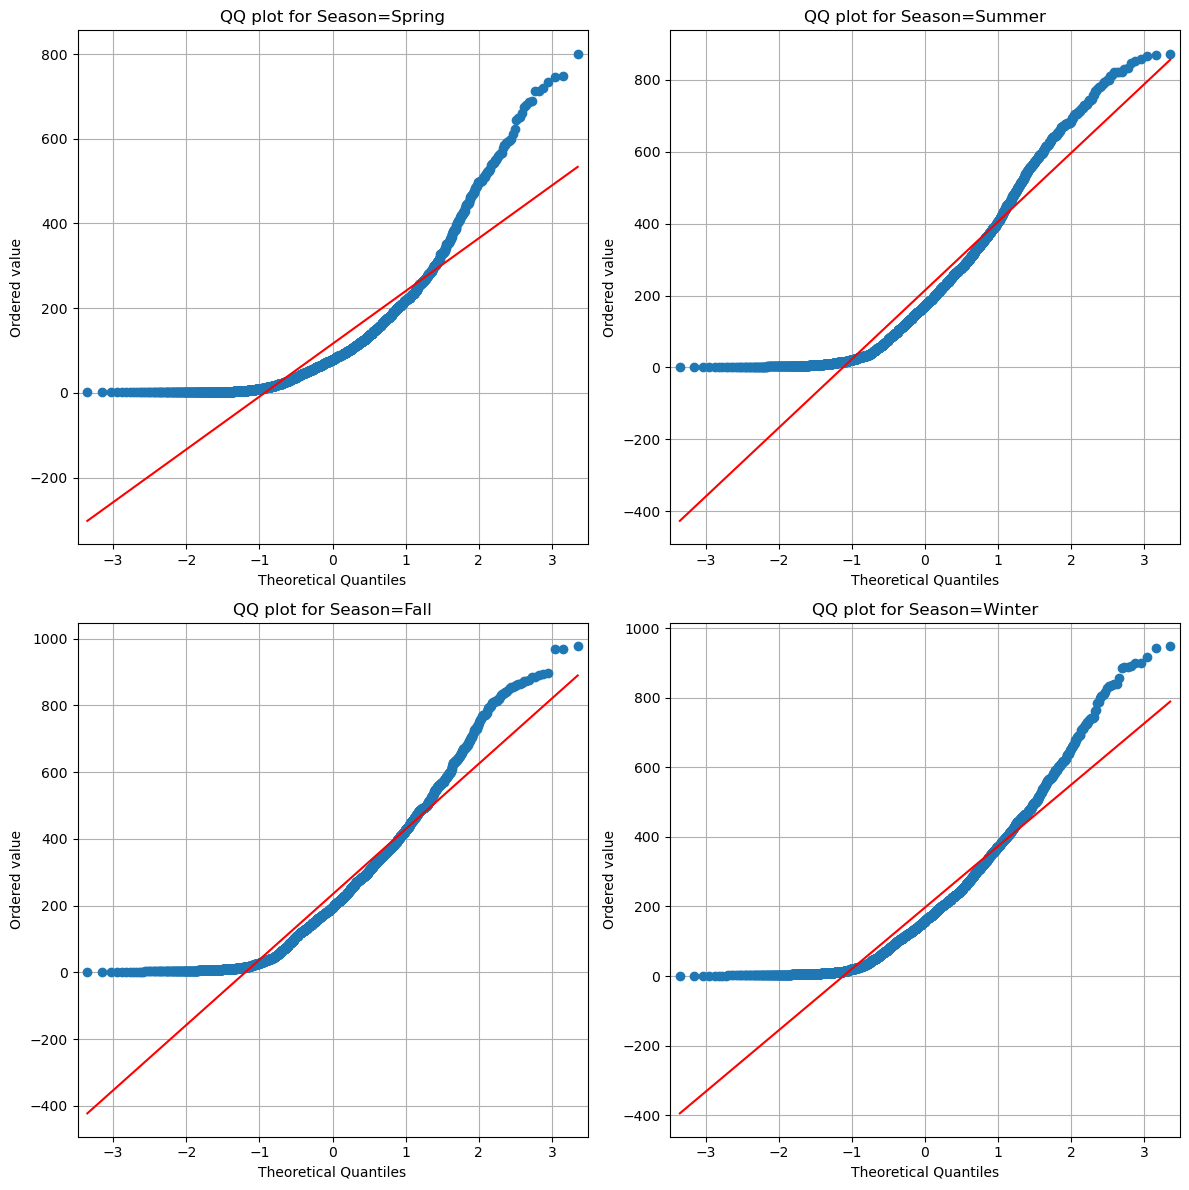

In [198]:
# Checking the normality by using QQ-plots.

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot QQ plots for each season category
for ax, (data, season) in zip(axes.ravel(), [(df_season_spring.sample(2500), 'Spring'), 
                                              (df_season_summer.sample(2500), 'Summer'), 
                                              (df_season_fall.sample(2500), 'Fall'), 
                                              (df_season_winter.sample(2500), 'Winter')]):
    qqplot(data, line='s', ax=ax)
    ax.set_title(f'QQ plot for Season={season}')
    ax.set_ylabel('Ordered value')
    ax.grid(True)

plt.tight_layout()
plt.show()

- It can be inferred from the above plots that the distributions do not follow normal distribution.

**b. Checking for normality using Skewness**

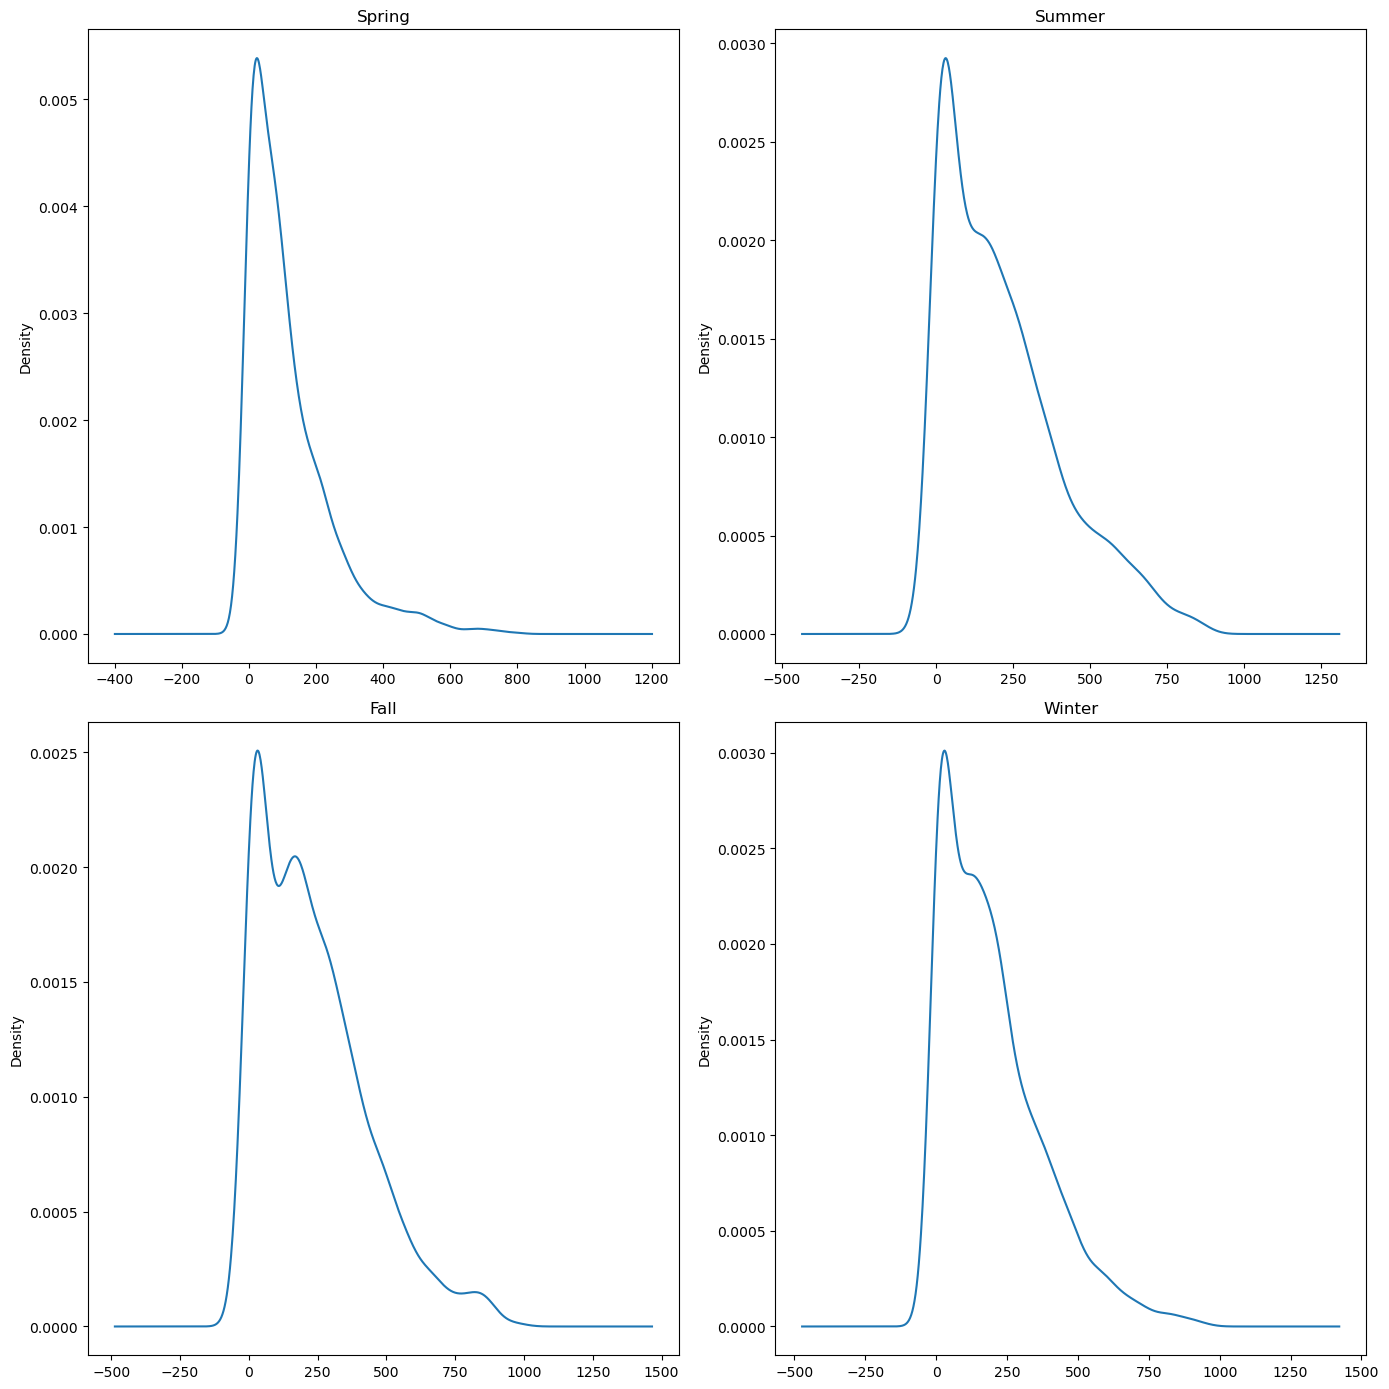

In [202]:
# Checking for normality of count for different seasons using Skewness.

df_season_spring = df.loc[df['season'] == 'Spring', 'count']
df_season_summer = df.loc[df['season'] == 'Summer', 'count']
df_season_fall = df.loc[df['season'] == 'Fall', 'count']
df_season_winter = df.loc[df['season'] == 'Winter', 'count']

plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
df_season_spring.plot(kind='density', sharex=False)
plt.title('Spring')

plt.subplot(2, 2, 2)
df_season_summer.plot(kind='density', sharex=False)
plt.title('Summer')

plt.subplot(2, 2, 3)
df_season_fall.plot(kind='density', sharex=False)
plt.title('Fall')

plt.subplot(2, 2, 4)
df_season_winter.plot(kind='density', sharex=False)
plt.title('Winter')

plt.tight_layout()
plt.show()

- For all four seasons the distribution is positive skewed or right skewed which indicated the distribution is not normal.

**c. Checking for normality using Kurtosis**

In [206]:
# Checking for normality using Kurtosis.

lst=['Spring','Summer','Fall','Winter']

for seasonn in lst:
# Calculation of kurtosis
    data_kurtosis = kurtosis(df[df['season'] == seasonn]['count'])

    # Print the kurtosis value
    print(f'Kurtosis for {seasonn} season:', data_kurtosis)

Kurtosis for Spring season: 4.30449666648592
Kurtosis for Summer season: 0.4222412657621657
Kurtosis for Fall season: 0.6959091337333851
Kurtosis for Winter season: 1.2689637849725477


- Positive kurtosis signals that the distribution is more peaked (leptokurtic) than a normal distribution.
- Tails of the distribution are heavier and there are more outliers.

**d. Checking for normality using Shapiro test.**

In [215]:
# Checking normality using shapiro test.

from scipy.stats import shapiro, kruskal

d = {}
d[1] = df_season_spring.sample(2500)
d[2] = df_season_summer.sample(2500)
d[3] = df_season_fall.sample(2500)
d[4] = df_season_winter.sample(2500)

for i in range(1, 5):
    test_stat, p_value = shapiro(d[i])
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample for does not follow a normal distribution')
    else:
        print('The sample follows a normal distribution')

p-value: 0.0
The sample for does not follow a normal distribution
p-value: 1.220180301499203e-37
The sample for does not follow a normal distribution
p-value: 1.6804215494318626e-35
The sample for does not follow a normal distribution
p-value: 2.0877298420084931e-38
The sample for does not follow a normal distribution


- It can be interpreted from the above observation that non of the distributions is normal.

**Checking the homogeneity of the variances using Levene's test.**

In [213]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.6973079761015006e-118
The samples do not have  Homogenous Variance


- Since the samples are not normally distributed and do not have the same variance, f_oneway test should be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [217]:
# Ho : Mean no. of cycles rented is same for different seasons.
# Ha : Mean no. of cycles rented is different for different seasons.
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Mean no. of cycles rented is different for different seasons')
else:
    print('Mean no. of cycles rented is same for different seasons.')

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151
Mean no. of cycles rented is different for different seasons


- Therefore, the average number of rental bikes is statistically different for different seasons.

### 4.5. Checking if Weather conditions are significantly different during different seasons.

In [218]:
df[['weather', 'season']].describe()

weather  season
count     10886   10886
unique        4       4
top           1  Winter
freq       7192    2734

- It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

**STEP-1** : Defining Null and Alternate Hypothesis.

- Null Hypothesis(Ho) - Weather is independent of the season.

- Alternate Hypothesis(Ha) - Weather is significantly dependent of the season.
------------------------------------------------------
**STEP-2** : Checking for basic assumptions for the hypothesis.

1. The data in the cells should be frequencies, or counts of cases.
2. The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
3. There are 2 variables, and both are measured as categories.
4. The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).
----------------------------------------------------------
**STEP-3** : Defining Test statistics.

- Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.
---------------------------------------
**STEP-4** : Computing the p-value and fix value of alpha.

- We will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05
---------------------------------------------------------
**STEP-5** : Comparing p-value and alpha.

- Based on p-value, we will accept or reject H0.
1. p-val > alpha : Accept H0
2. p-val < alpha : Reject H0

In [219]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
  # for a particular season and weather 
cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather         1         2        3      4
season                                     
Fall     470116.0  139386.0  31160.0    0.0
Spring   223009.0   76406.0  12919.0  164.0
Summer   426350.0  134177.0  27755.0    0.0
Winter   356588.0  157191.0  30255.0    0.0

- Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [220]:
cross_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]], dtype=int64)

In [223]:
from scipy.stats import chi2_contingency
chi_test_stat, p_value, dof, expected = chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [225]:
# Comparing p value with significance level
alpha = 0.05
if p_value < alpha:
    print('Weather is significantly dependent of the season.')
else:
    print('Weather is independent of the season.')

Weather is significantly dependent of the season.


- Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

----------------

## 5. Insights

- Mean temp = 20.23 degree celsius & Standart deviation of temp = 7.79
- Mean Humidity = 61.89 & Standart deviation of humidity = 19.24
- Mean Windspeed = 12.8 & Standart deviation of windspeed = 8.16
-----------------------------------------
- Out of every 100 users, around 19 are casual users and 81 are registered users.

- The mean total hourly count of bikes rented is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

- Weather patters is mostly Clear or Few clouds or partly cloudy or partly cloudy which is expected in a tropical country like India.

- More bikes are rented on holidays and non-working days.

- There is a seasonal pattern in the count of rental bikes, with higher demand during the fall and summer months, a slight decline in the winter, and a further decrease in the spring months.

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

- There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

- More than 80 % of the time, the temperature is less than 28 degrees celcius.

- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

- More than 85 % of the total, windspeed data has a value of less than 20.
------------------------------------------------------
**Hypothesis results**
- The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

- The mean hourly count of the total rental bikes is statistically similar for both holiday and non-holidays.

- There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

- The hourly total number of rental bikes is statistically different for different weathers.

- There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.

- The hourly total number of rental bikes is statistically different for different seasons.

---------------

## 6. Recommendations

- **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the fall and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.
- **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.
- **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.
- **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.
- **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.
- **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.
- **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.
- **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.
- **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

- **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

- **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

- **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.

--------------